In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/ToyotaCorolla - MLR.csv')
df.head()

Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170

In [ ]:
df.describe()
#Count 1436 so nonnull entries
# Positive skewness in Price,KM,Weight as mean>median and diff between 75% and max is also huge so outliers are present
#Cylinders value is same

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

In [ ]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [ ]:
df.describe(include='object')

Fuel_Type
count       1436
unique         3
top       Petrol
freq        1264

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
df['Cylinders'].unique()

array([4])

In [ ]:
df.drop(columns=['Cylinders'],inplace=True)

In [ ]:
#Find Duplicates
df.duplicated().sum()

1

In [ ]:
df[df.duplicated(keep=False)]

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  Gears  \
112  24950          8  13253    Diesel  116          0  2000      5      5   
113  24950          8  13253    Diesel  116          0  2000      5      5   

     Weight  
112    1320  
113    1320

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Gears        0
Weight       0
dtype: int64

#Outlier Detection

In [ ]:
df.describe()
#Count 1436 so nonnull entries
# Positive skewness in Price,KM,Weight as mean>median and diff between 75% and max is also huge so outliers are present
#Cylinders value is same

Price    Age_08_04             KM           HP    Automatic  \
count   1435.000000  1435.000000    1435.000000  1435.000000  1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986     0.055749   
std     3608.732978    18.563312   37491.094553    14.981408     0.229517   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63451.000000   110.000000     0.000000   
75%    11950.000000    70.000000   87041.500000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                 cc        Doors        Gears       Weight  
count   1435.000000  1435.000000  1435.000000  1435.000000  
mean    1576.560976     4.032753     5.026481  1072.287108  
std      424.387533     0.952667     0.188575    52.251882  
min     1300.000000     2.000000     3.000000  1000.000000  
25%     1400.000000     3.000000     5.000000  1040.000000  
50%     1600.000000     4.000000     5.000000  1070.000000  
75%     1600.000000     5.000000     5.000000  1085.000000  
max    16000.000000     5.000000     6.000000  1615.000000

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>],
       [<Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Gears'}>,
        <Axes: title={'center': 'Weight'}>]], dtype=object)

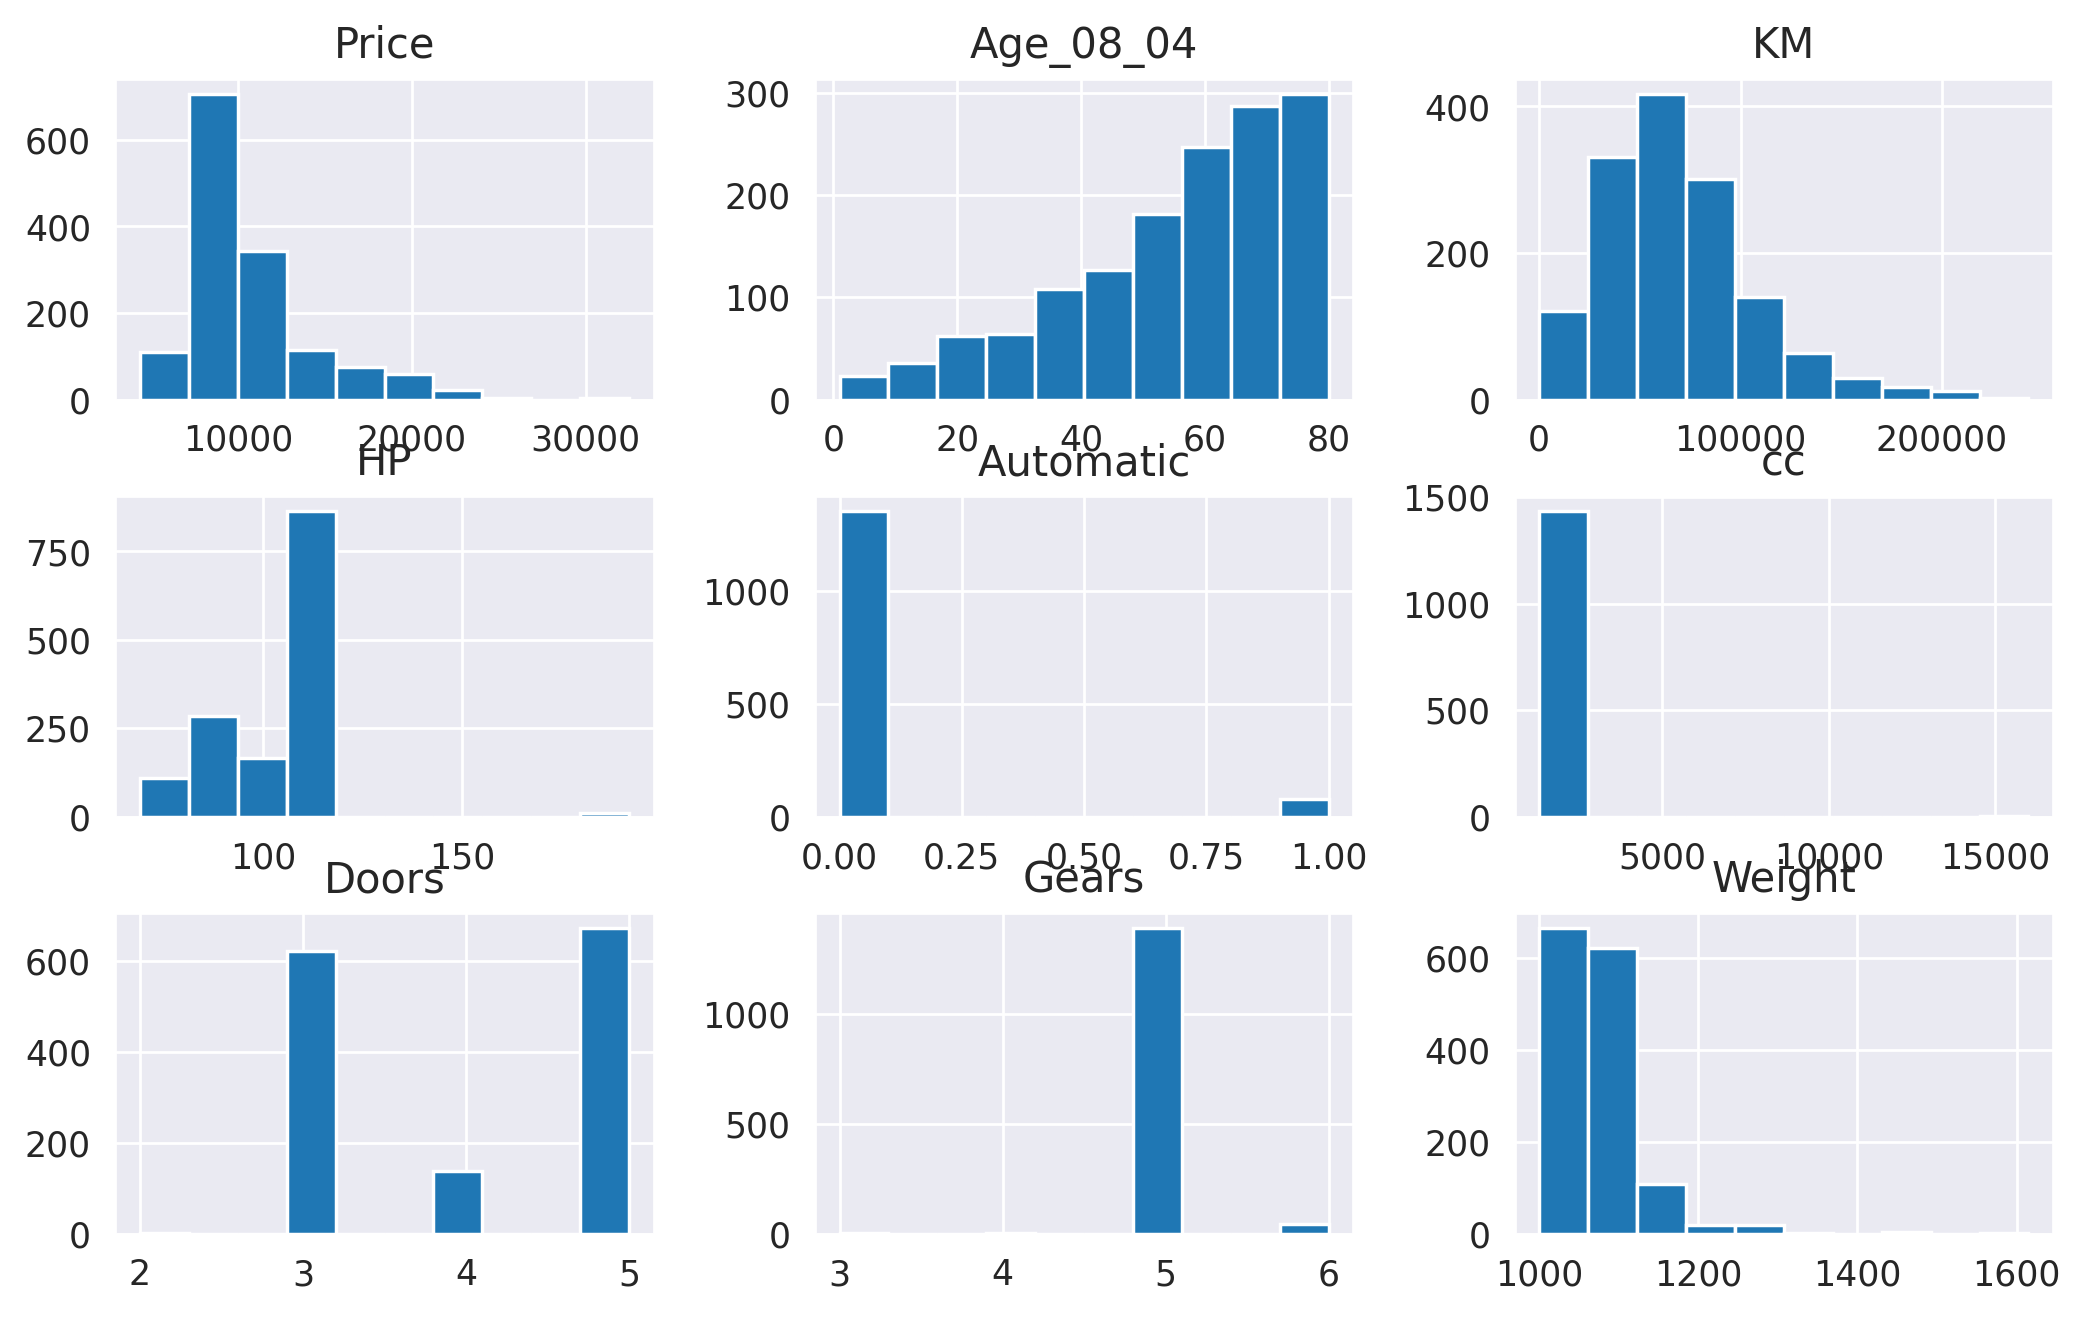

In [ ]:
df.hist()

<Axes: >

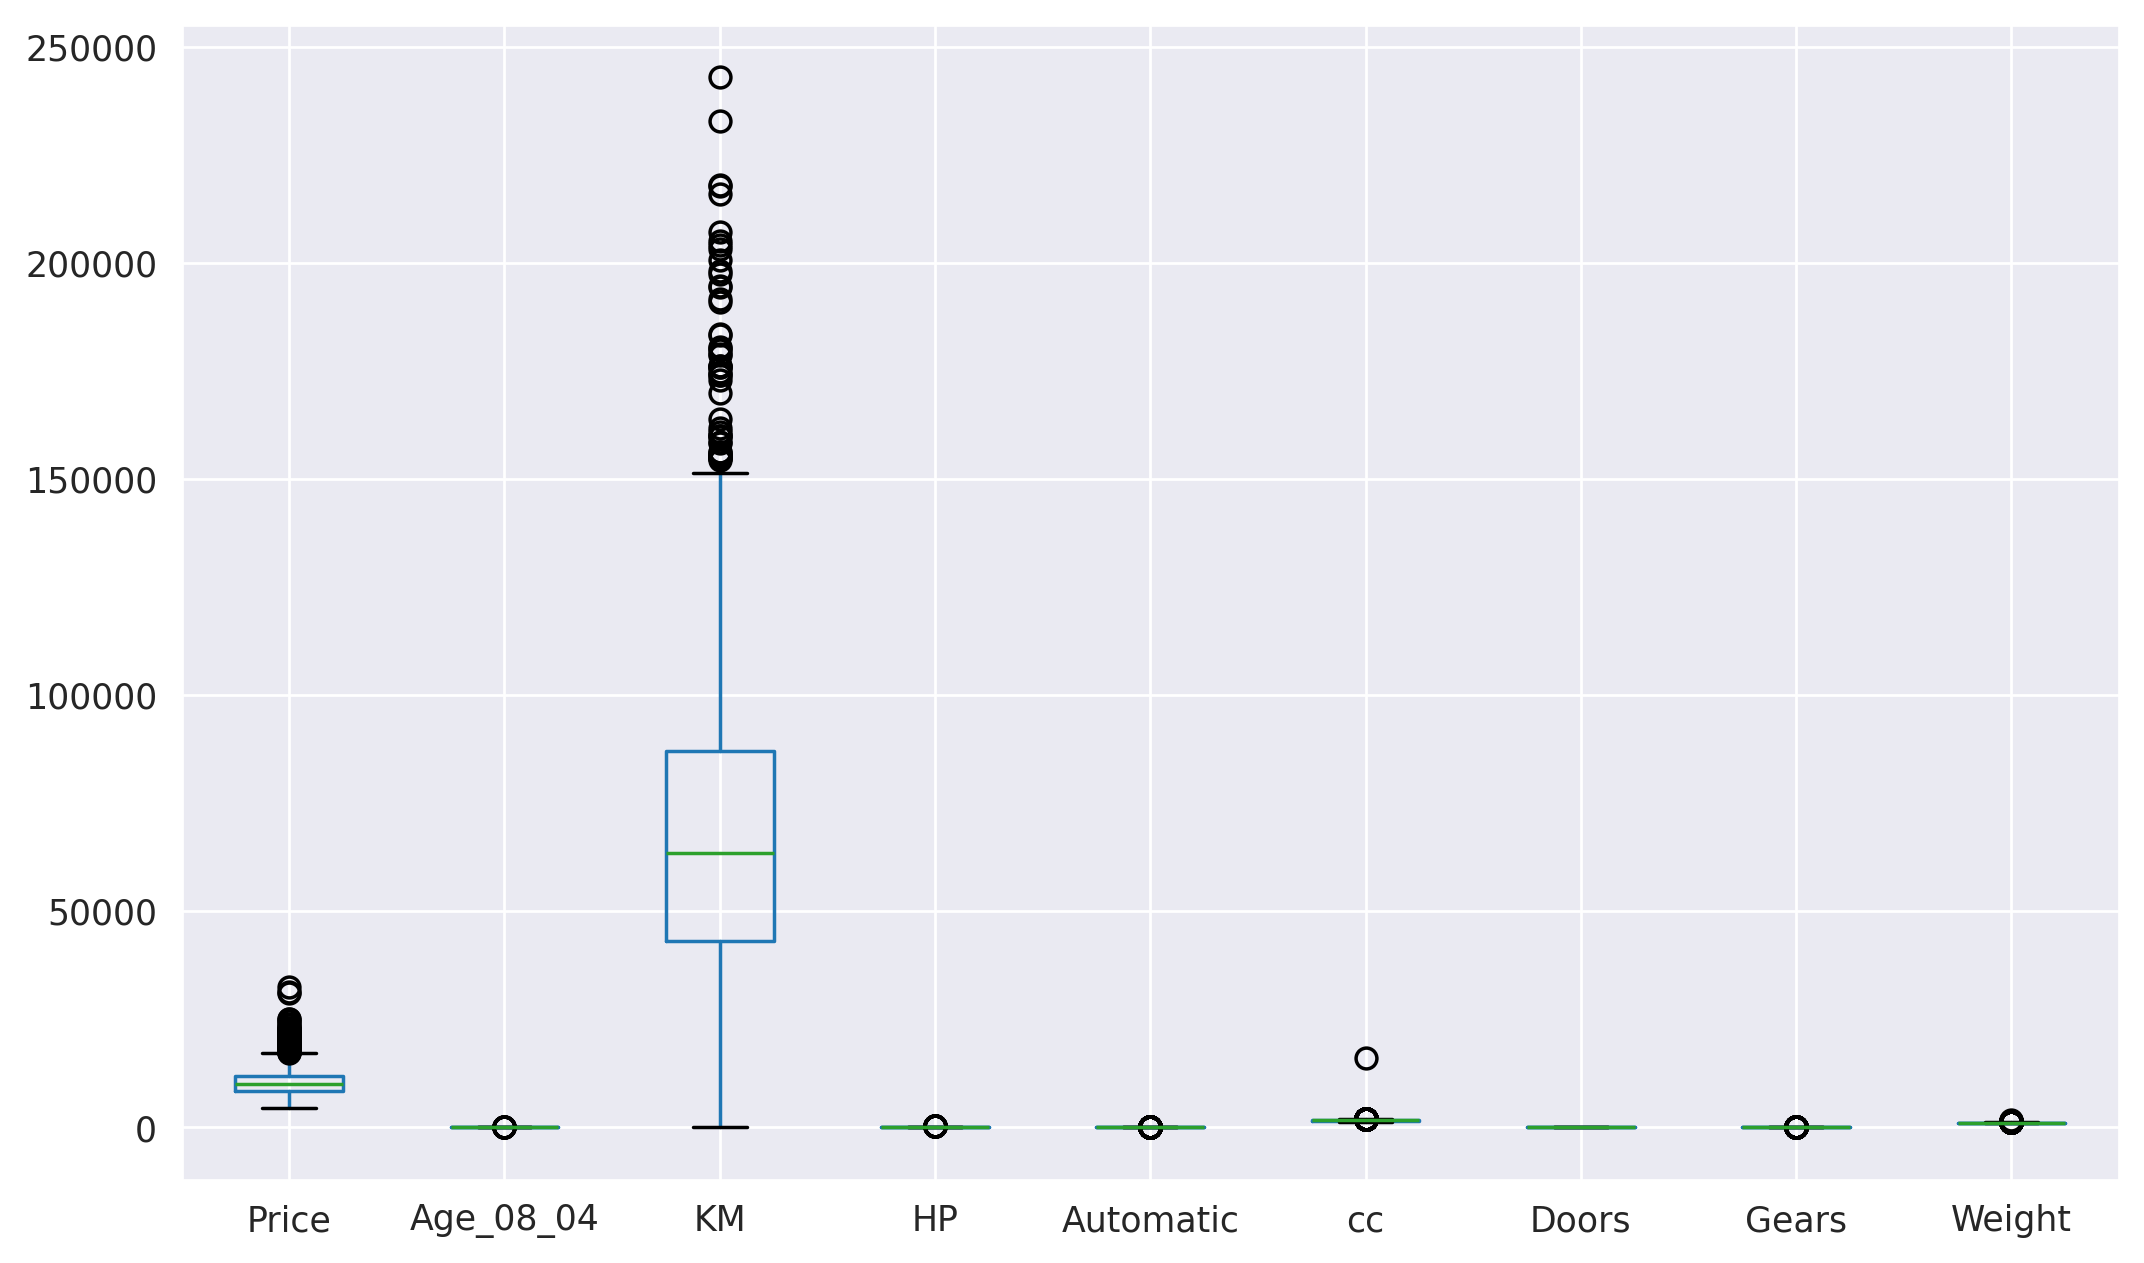

In [ ]:
df.boxplot()

Outlier Treatment

In [ ]:
def outlier_detection(df,col):
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  lower_limit=q1-1.5*iqr
  upper_limit=q3+1.5*iqr
  return lower_limit,upper_limit

In [ ]:
outlier_detection(df,'Price')

(3200.0, 17200.0)

#Data Visualization

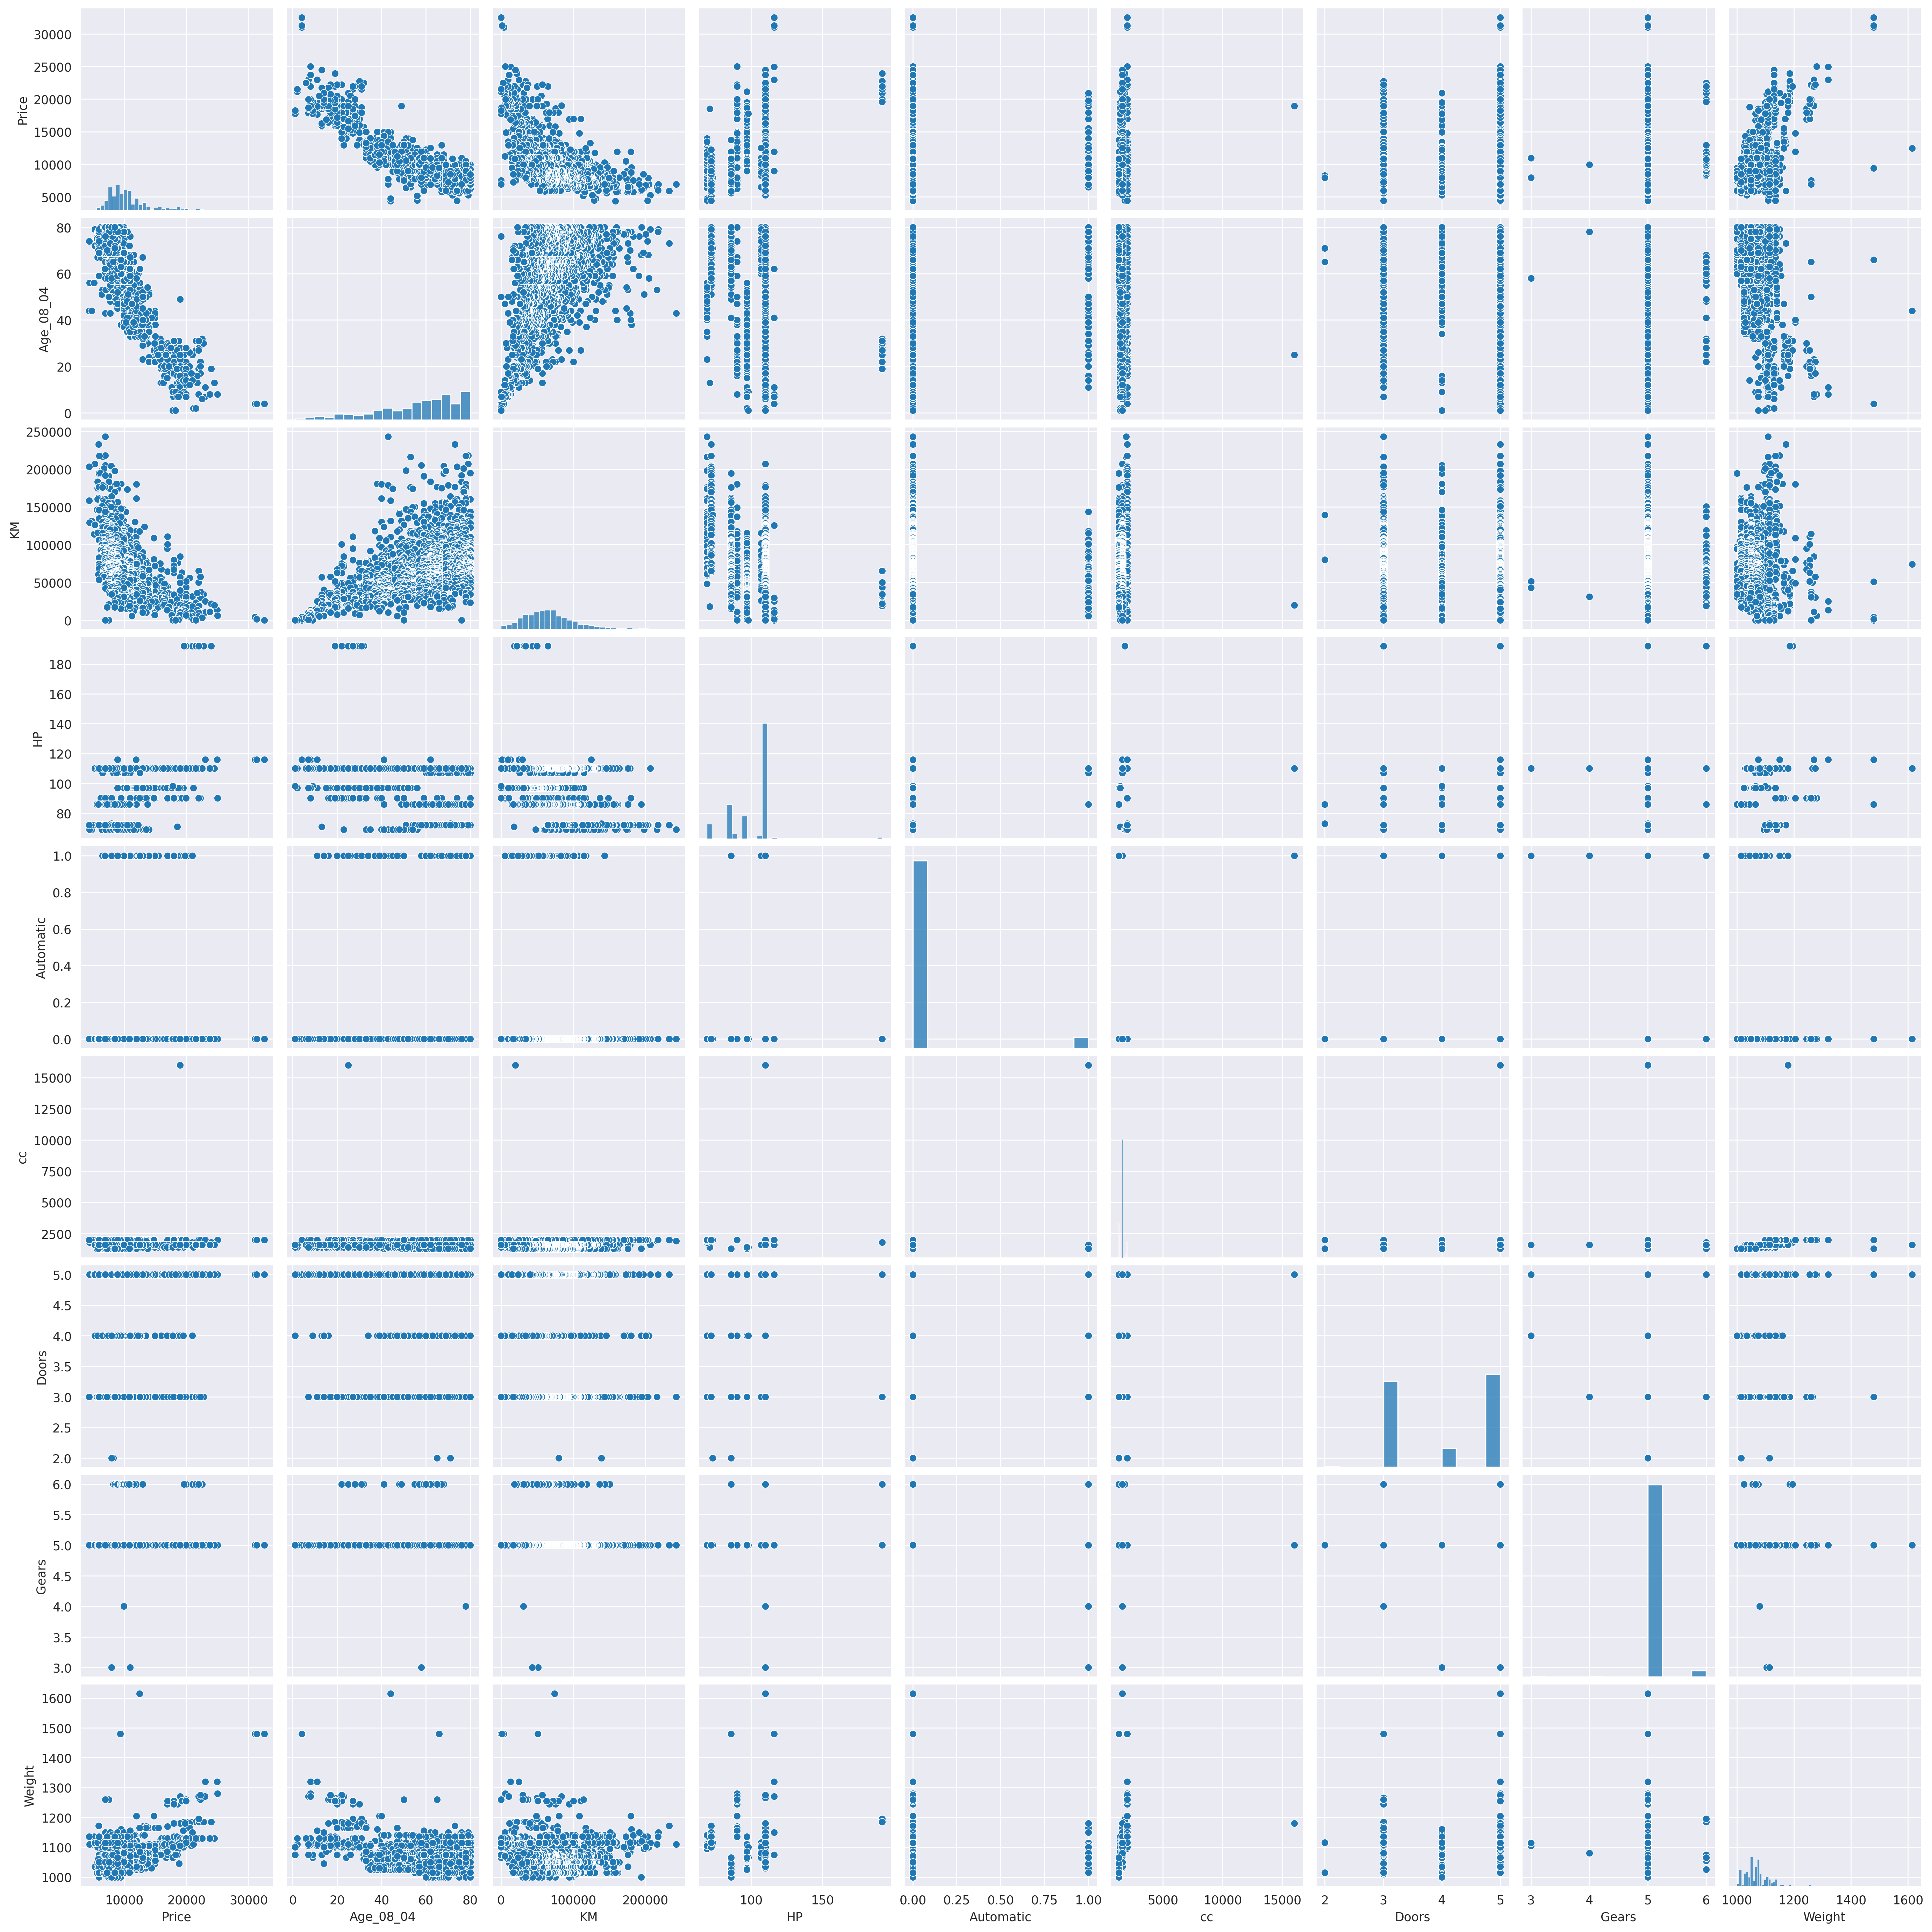

In [ ]:
sns.pairplot(df)

<Axes: >

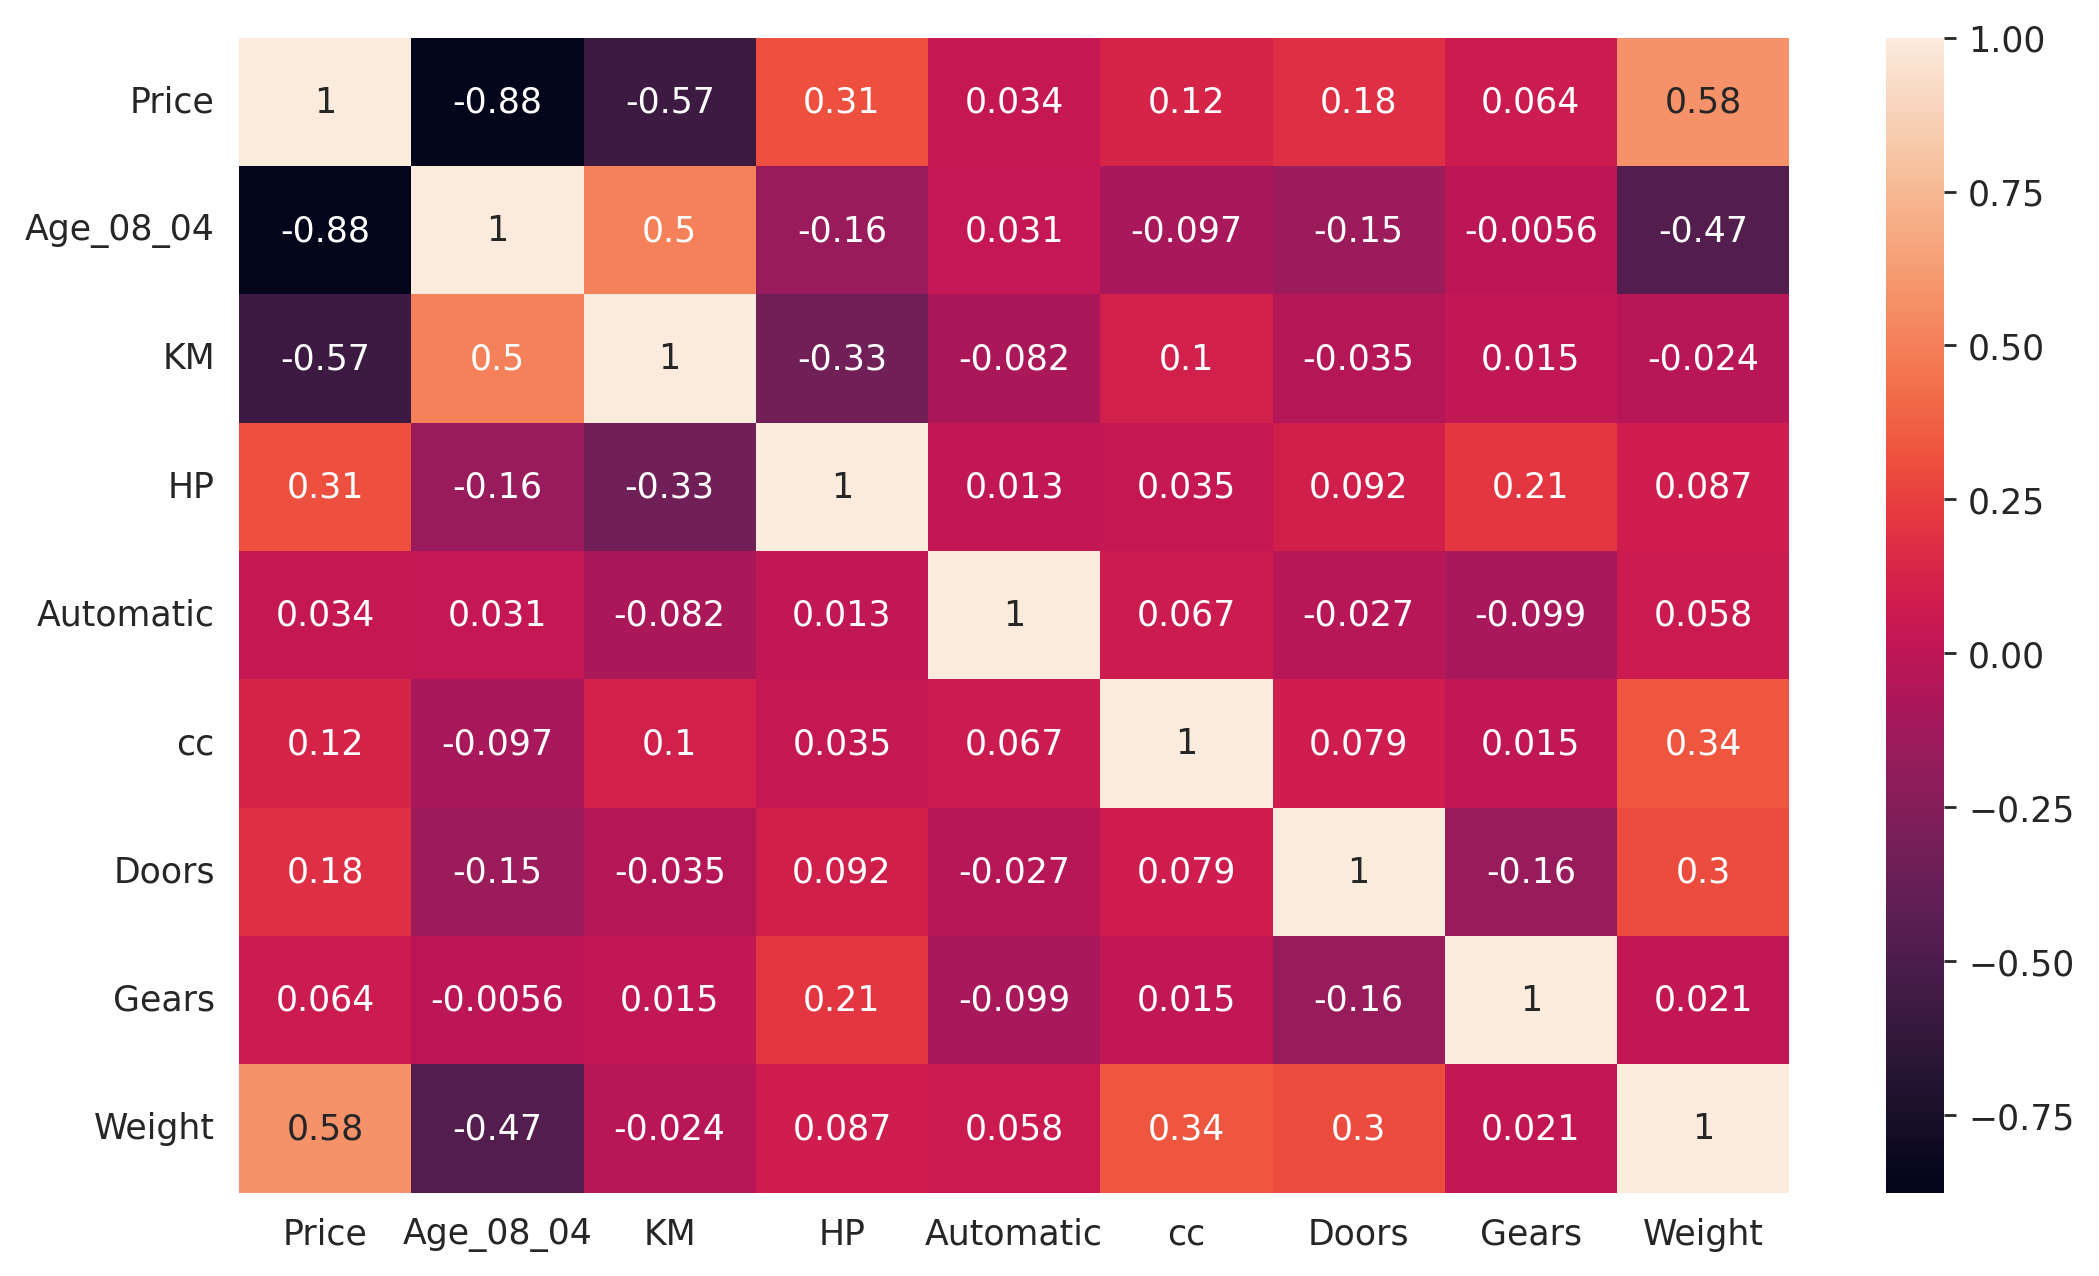

In [ ]:
#confirm correlation with heatmap
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=df).fit()
model.pvalues

Intercept     1.524874e-07
Age_08_04    2.829516e-290
KM            6.982223e-55
HP            1.603198e-26
cc            3.364292e-01
Doors         8.083501e-01
Gears         1.611598e-03
Weight        6.157002e-89
dtype: float64

In [ ]:
model.rsquared #Very Good model

0.861684319120475

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 # get the locations
X = df.iloc[:, 1:]
Y= df.iloc[:, 0]


# split the dataset
X_train, X_test, Y_train, Y_test= train_test_split(
    X,Y, test_size=0.20, random_state=0)

In [ ]:
X_train

Age_08_04      KM Fuel_Type   HP  Automatic    cc  Doors  Gears  Weight
1323         80   66843    Petrol  110          0  1600      5      5    1075
610          68  155720    Petrol   86          0  1300      3      5    1015
512          51   53268    Petrol  110          0  1600      5      5    1080
878          60   61977    Petrol   86          0  1300      3      5    1015
1275         80   74151    Petrol  110          0  1600      3      5    1050
...         ...     ...       ...  ...        ...   ...    ...    ...     ...
764          59   79660    Petrol   86          1  1300      5      5    1065
836          68   67146    Petrol  110          0  1600      5      5    1075
1217         80   85565    Petrol  110          0  1600      5      5    1070
560          54   39291    Petrol  110          0  1600      3      5    1040
685          61  100748    Petrol  110          0  1600      5      5    1070

[1148 rows x 9 columns]

In [ ]:
Y_train

0        9450
1        6950
2       13950
3        8500
4        7250
        ...  
1143    10950
1144    10950
1145     8250
1146    10950
1147     8950
Name: Price, Length: 1148, dtype: int64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1148 entries, 1323 to 685
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age_08_04  1148 non-null   int64 
 1   KM         1148 non-null   int64 
 2   Fuel_Type  1148 non-null   object
 3   HP         1148 non-null   int64 
 4   Automatic  1148 non-null   int64 
 5   cc         1148 non-null   int64 
 6   Doors      1148 non-null   int64 
 7   Gears      1148 non-null   int64 
 8   Weight     1148 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 89.7+ KB


#Residual Analysis

In [ ]:
train_data=pd.concat([X_train,Y_train],axis=1)
train_data
#Final model
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight', data=train_data).fit()  # Use the combined data
model.rsquared

0.8589124464274225

In [ ]:
train_data

Age_08_04      KM Fuel_Type   HP  Automatic    cc  Doors  Gears  Weight  \
1323         80   66843    Petrol  110          0  1600      5      5    1075   
610          68  155720    Petrol   86          0  1300      3      5    1015   
512          51   53268    Petrol  110          0  1600      5      5    1080   
878          60   61977    Petrol   86          0  1300      3      5    1015   
1275         80   74151    Petrol  110          0  1600      3      5    1050   
...         ...     ...       ...  ...        ...   ...    ...    ...     ...   
764          59   79660    Petrol   86          1  1300      5      5    1065   
836          68   67146    Petrol  110          0  1600      5      5    1075   
1217         80   85565    Petrol  110          0  1600      5      5    1070   
560          54   39291    Petrol  110          0  1600      3      5    1040   
685          61  100748    Petrol  110          0  1600      5      5    1070   

      Price  
1323   9450  
610    6950  
512   13950  
878    8500  
1275   7250  
...     ...  
764   10950  
836   10950  
1217   8250  
560   10950  
685    8950  

[1148 rows x 10 columns]

In [ ]:
import statsmodels.api as sm
model.fittedvalues #Predicted

1323     7988.246866
610      6374.072343
512     11910.756124
878      9027.458001
1275     7371.313951
            ...     
764      9851.651094
836      9462.343497
1217     7549.628861
560     10985.434341
685      9622.142505
Length: 1148, dtype: float64

In [ ]:
model.params

Intercept   -7826.871079
Age_08_04    -123.290415
KM             -0.017783
HP             26.999242
cc             -1.205245
Doors         -20.710250
Gears         641.634927
Weight         21.135715
dtype: float64

In [ ]:
model.resid

1323    1461.753134
610      575.927657
512     2039.243876
878     -527.458001
1275    -121.313951
           ...     
764     1098.348906
836     1487.656503
1217     700.371139
560      -35.434341
685     -672.142505
Length: 1148, dtype: float64

#Q-Q Plot

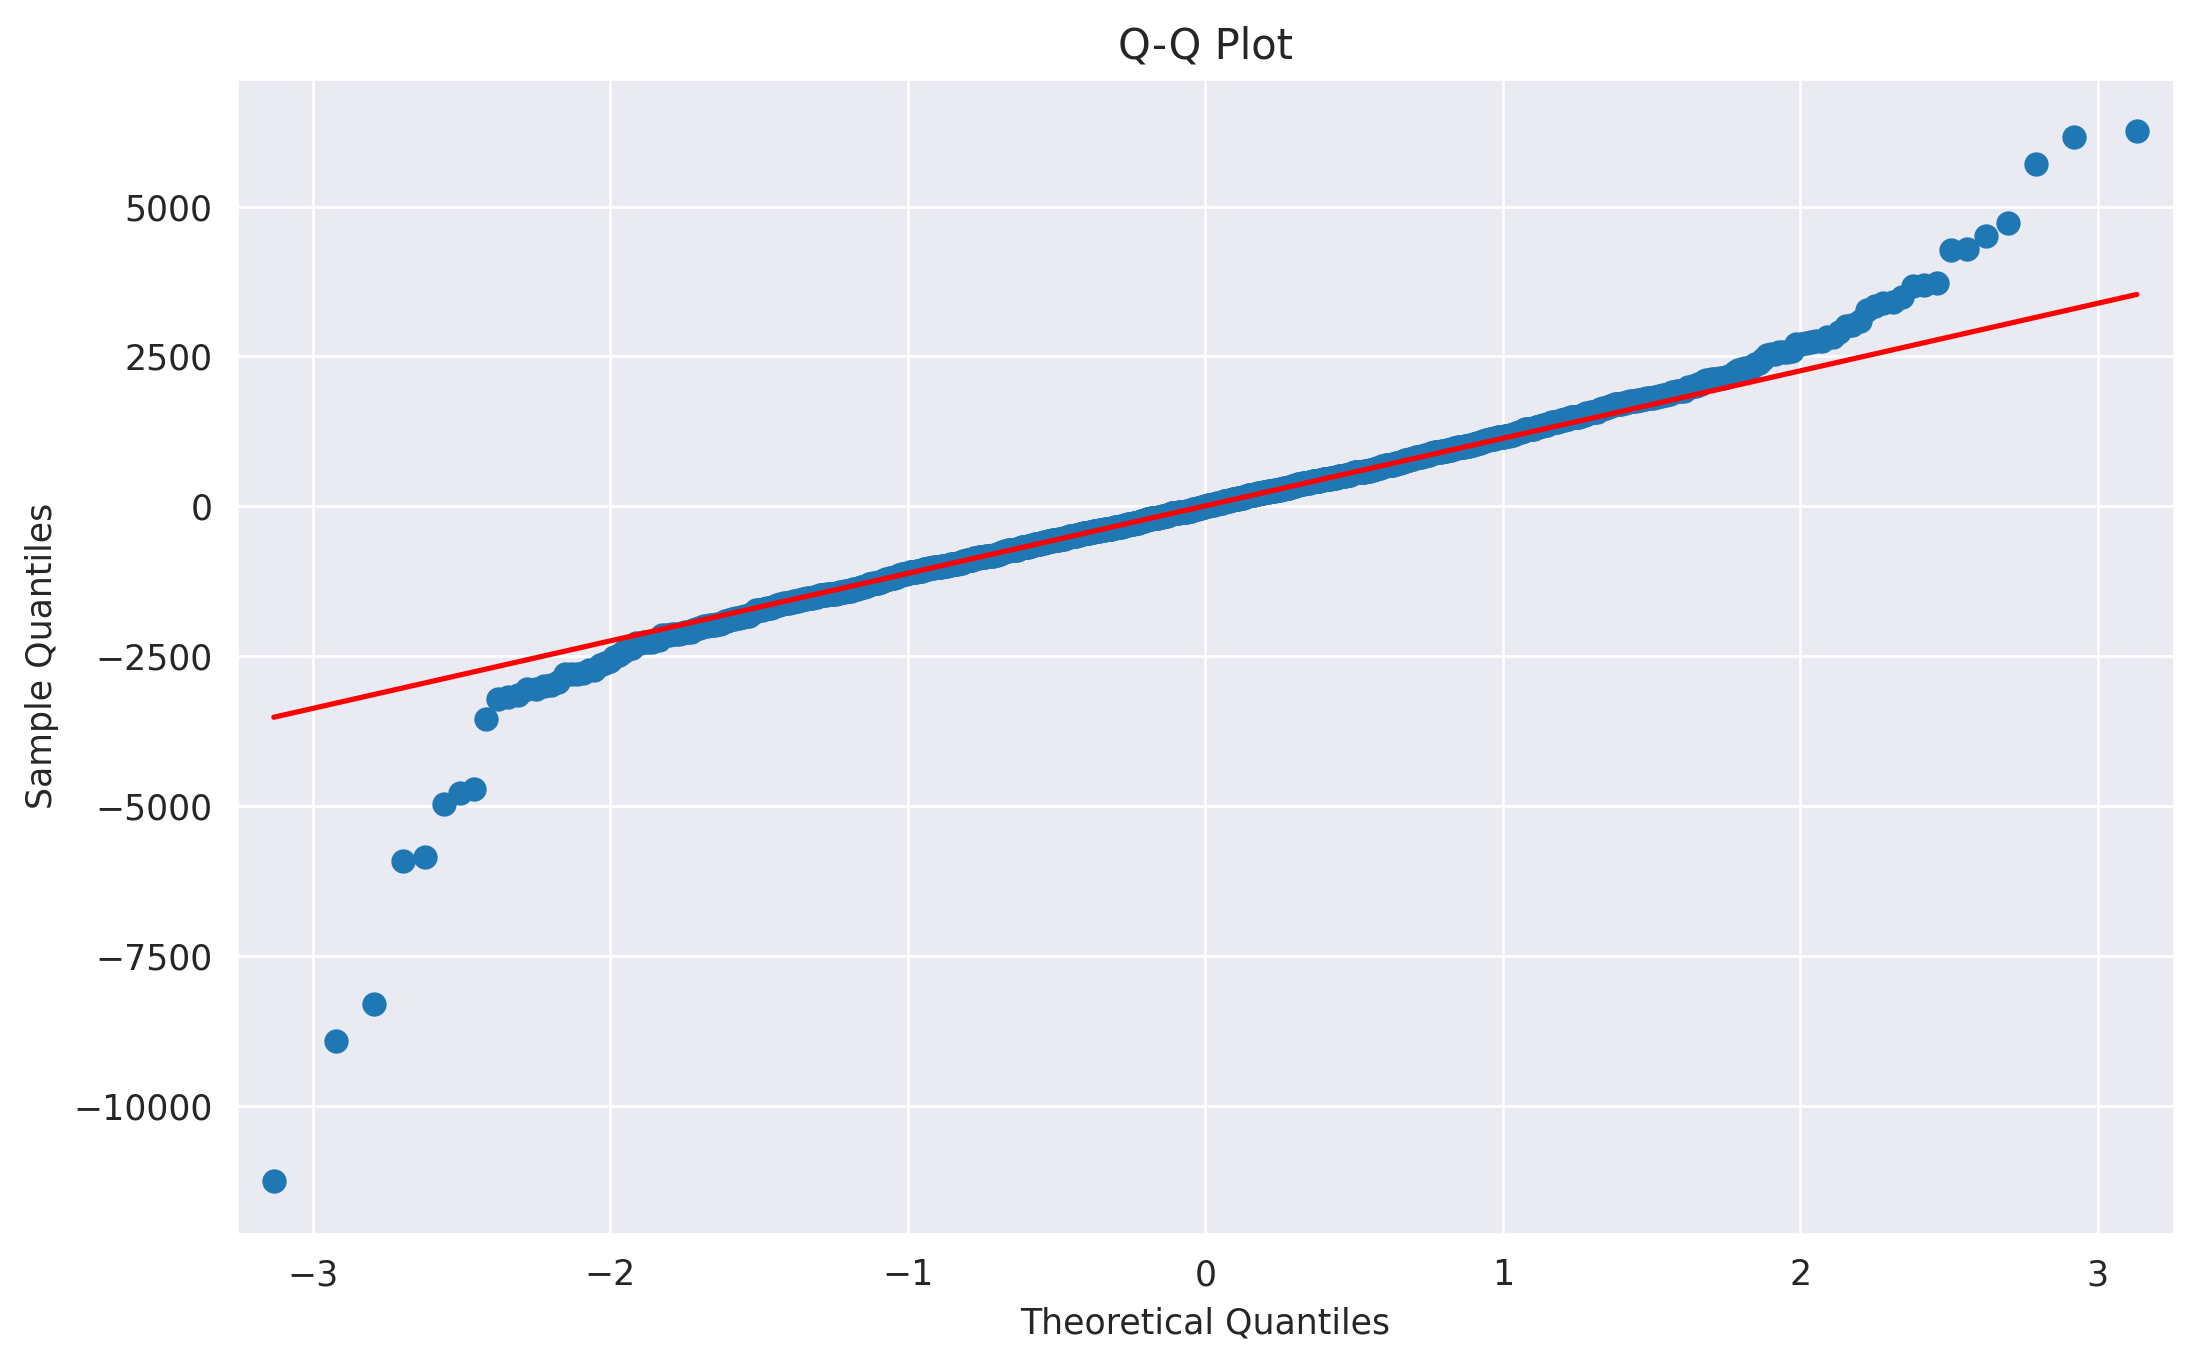

In [ ]:
sm.qqplot(model.resid,line='q')
plt.title('Q-Q Plot')
plt.show()

In [ ]:
#Get index for higher residuals
np.argmax(model.resid),np.max(model.resid)

(897, 6255.5932835001)

#Residual plot for Homoscedasticity

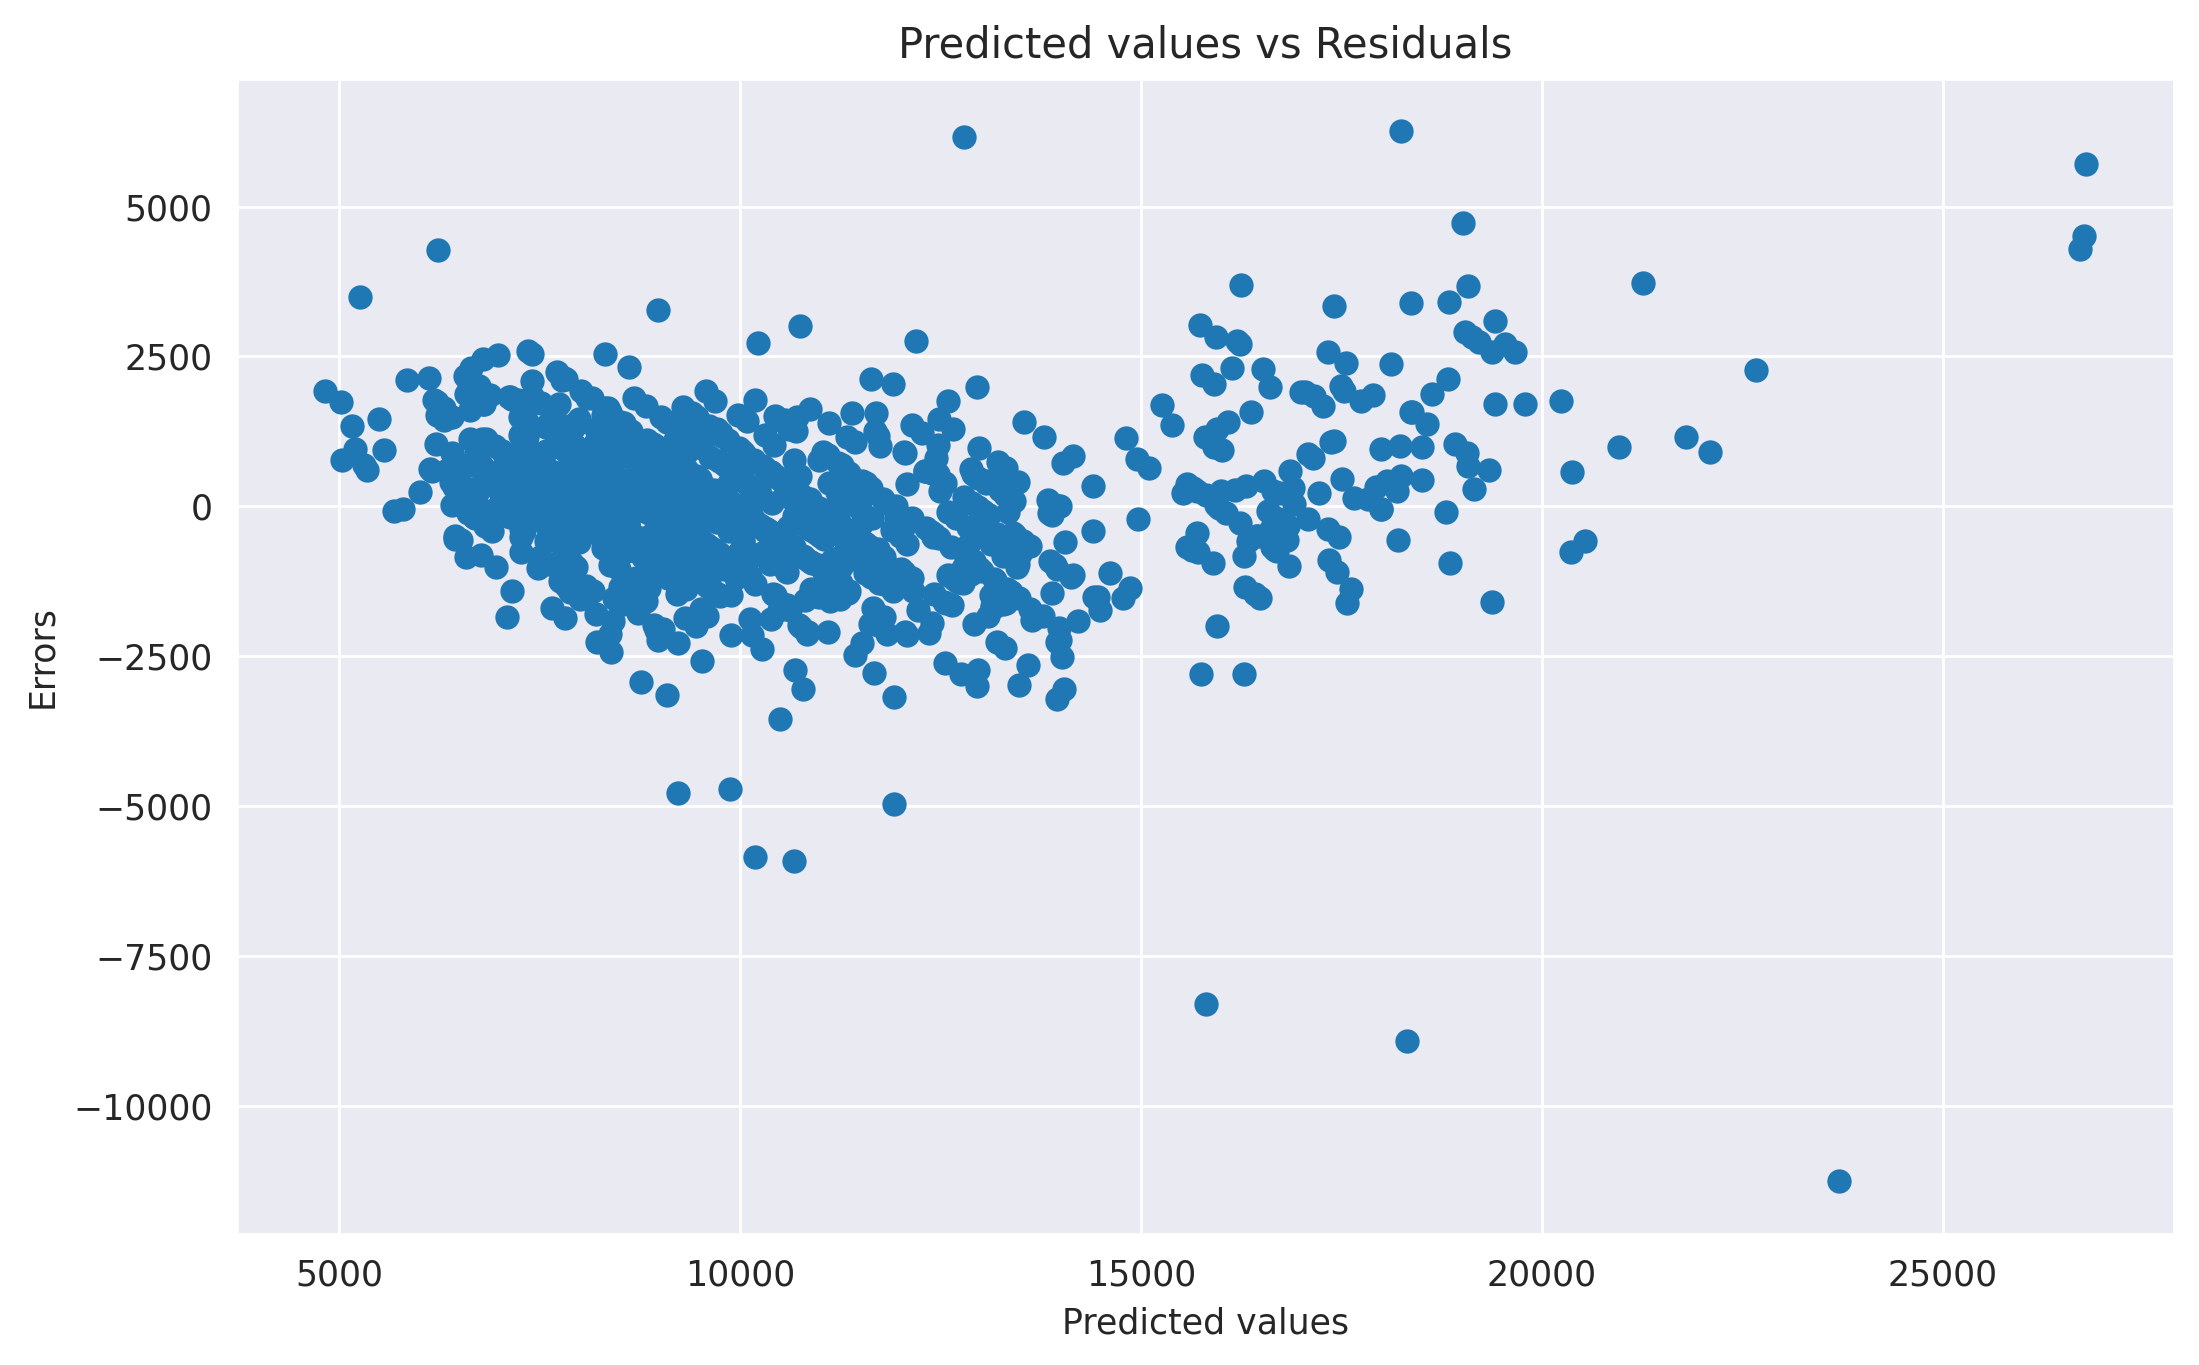

In [ ]:
plt.scatter(model.fittedvalues,model.resid)
plt.title('Predicted values vs Residuals')
plt.xlabel('Predicted values')
plt.ylabel('Errors')
plt.show()

#Residual vs Regressor

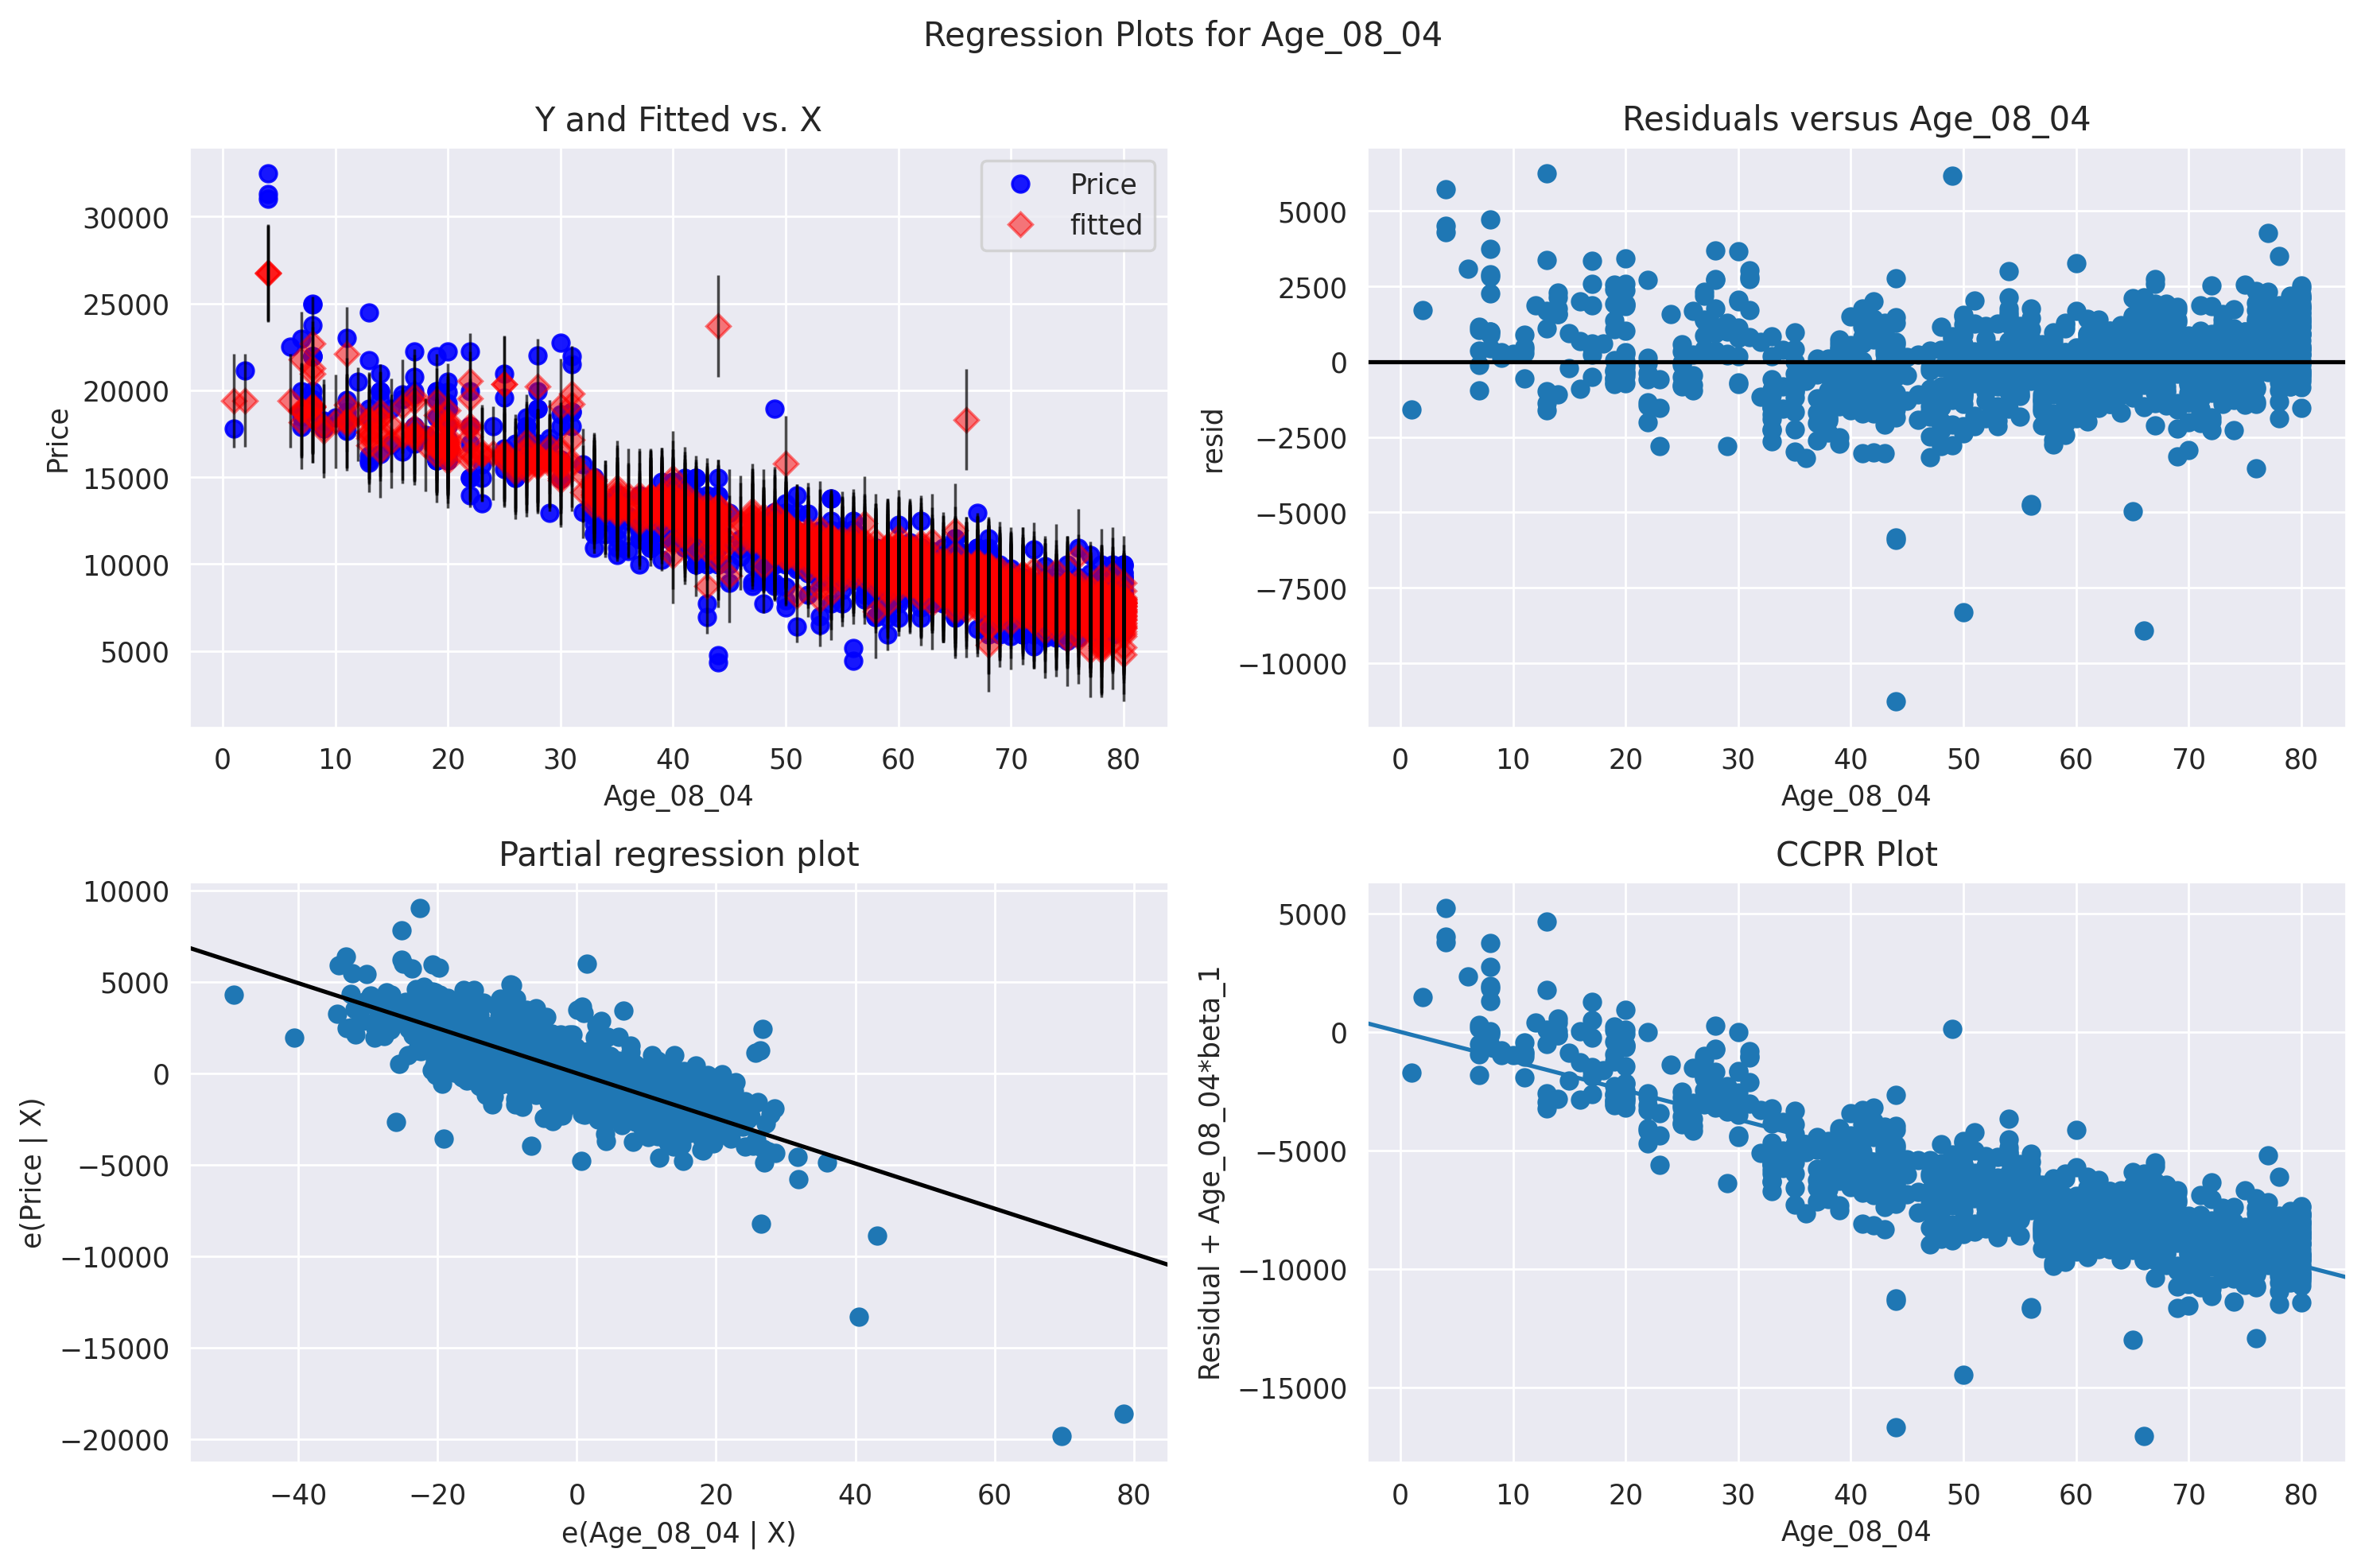

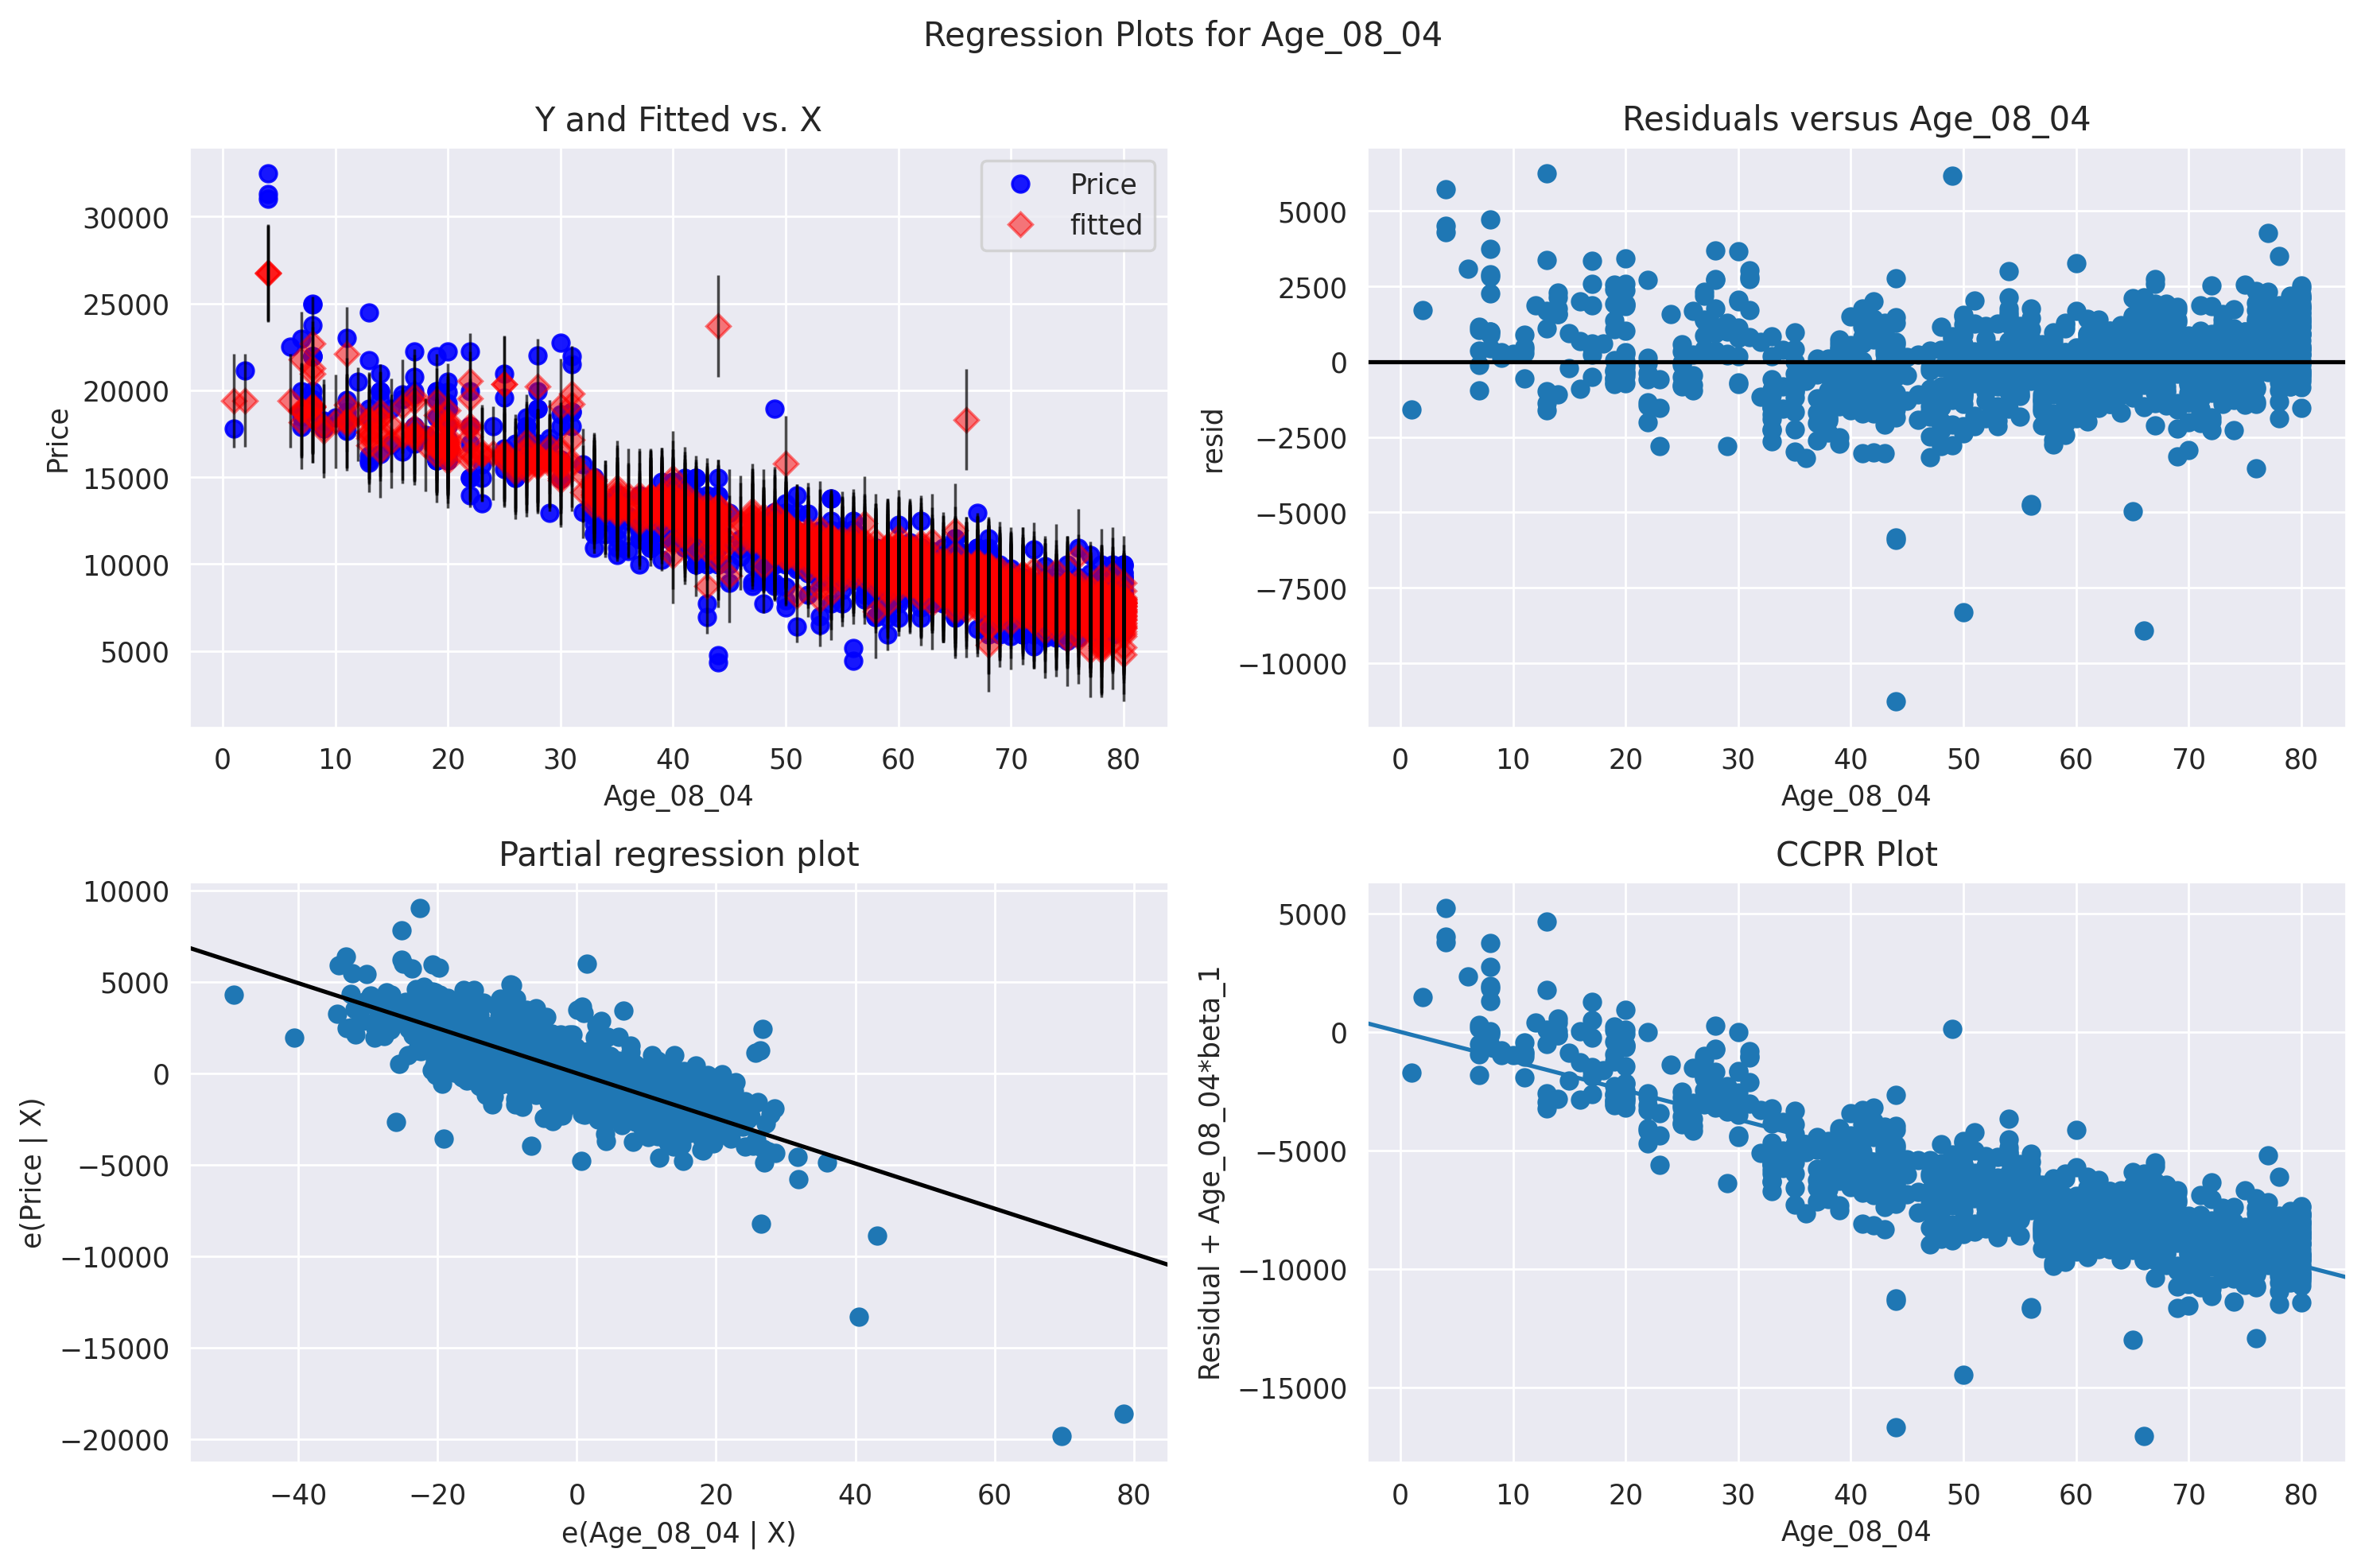

In [ ]:
#For Age

sm.graphics.plot_regress_exog(model,'Age_08_04',fig=plt.figure(figsize=(12,8)))

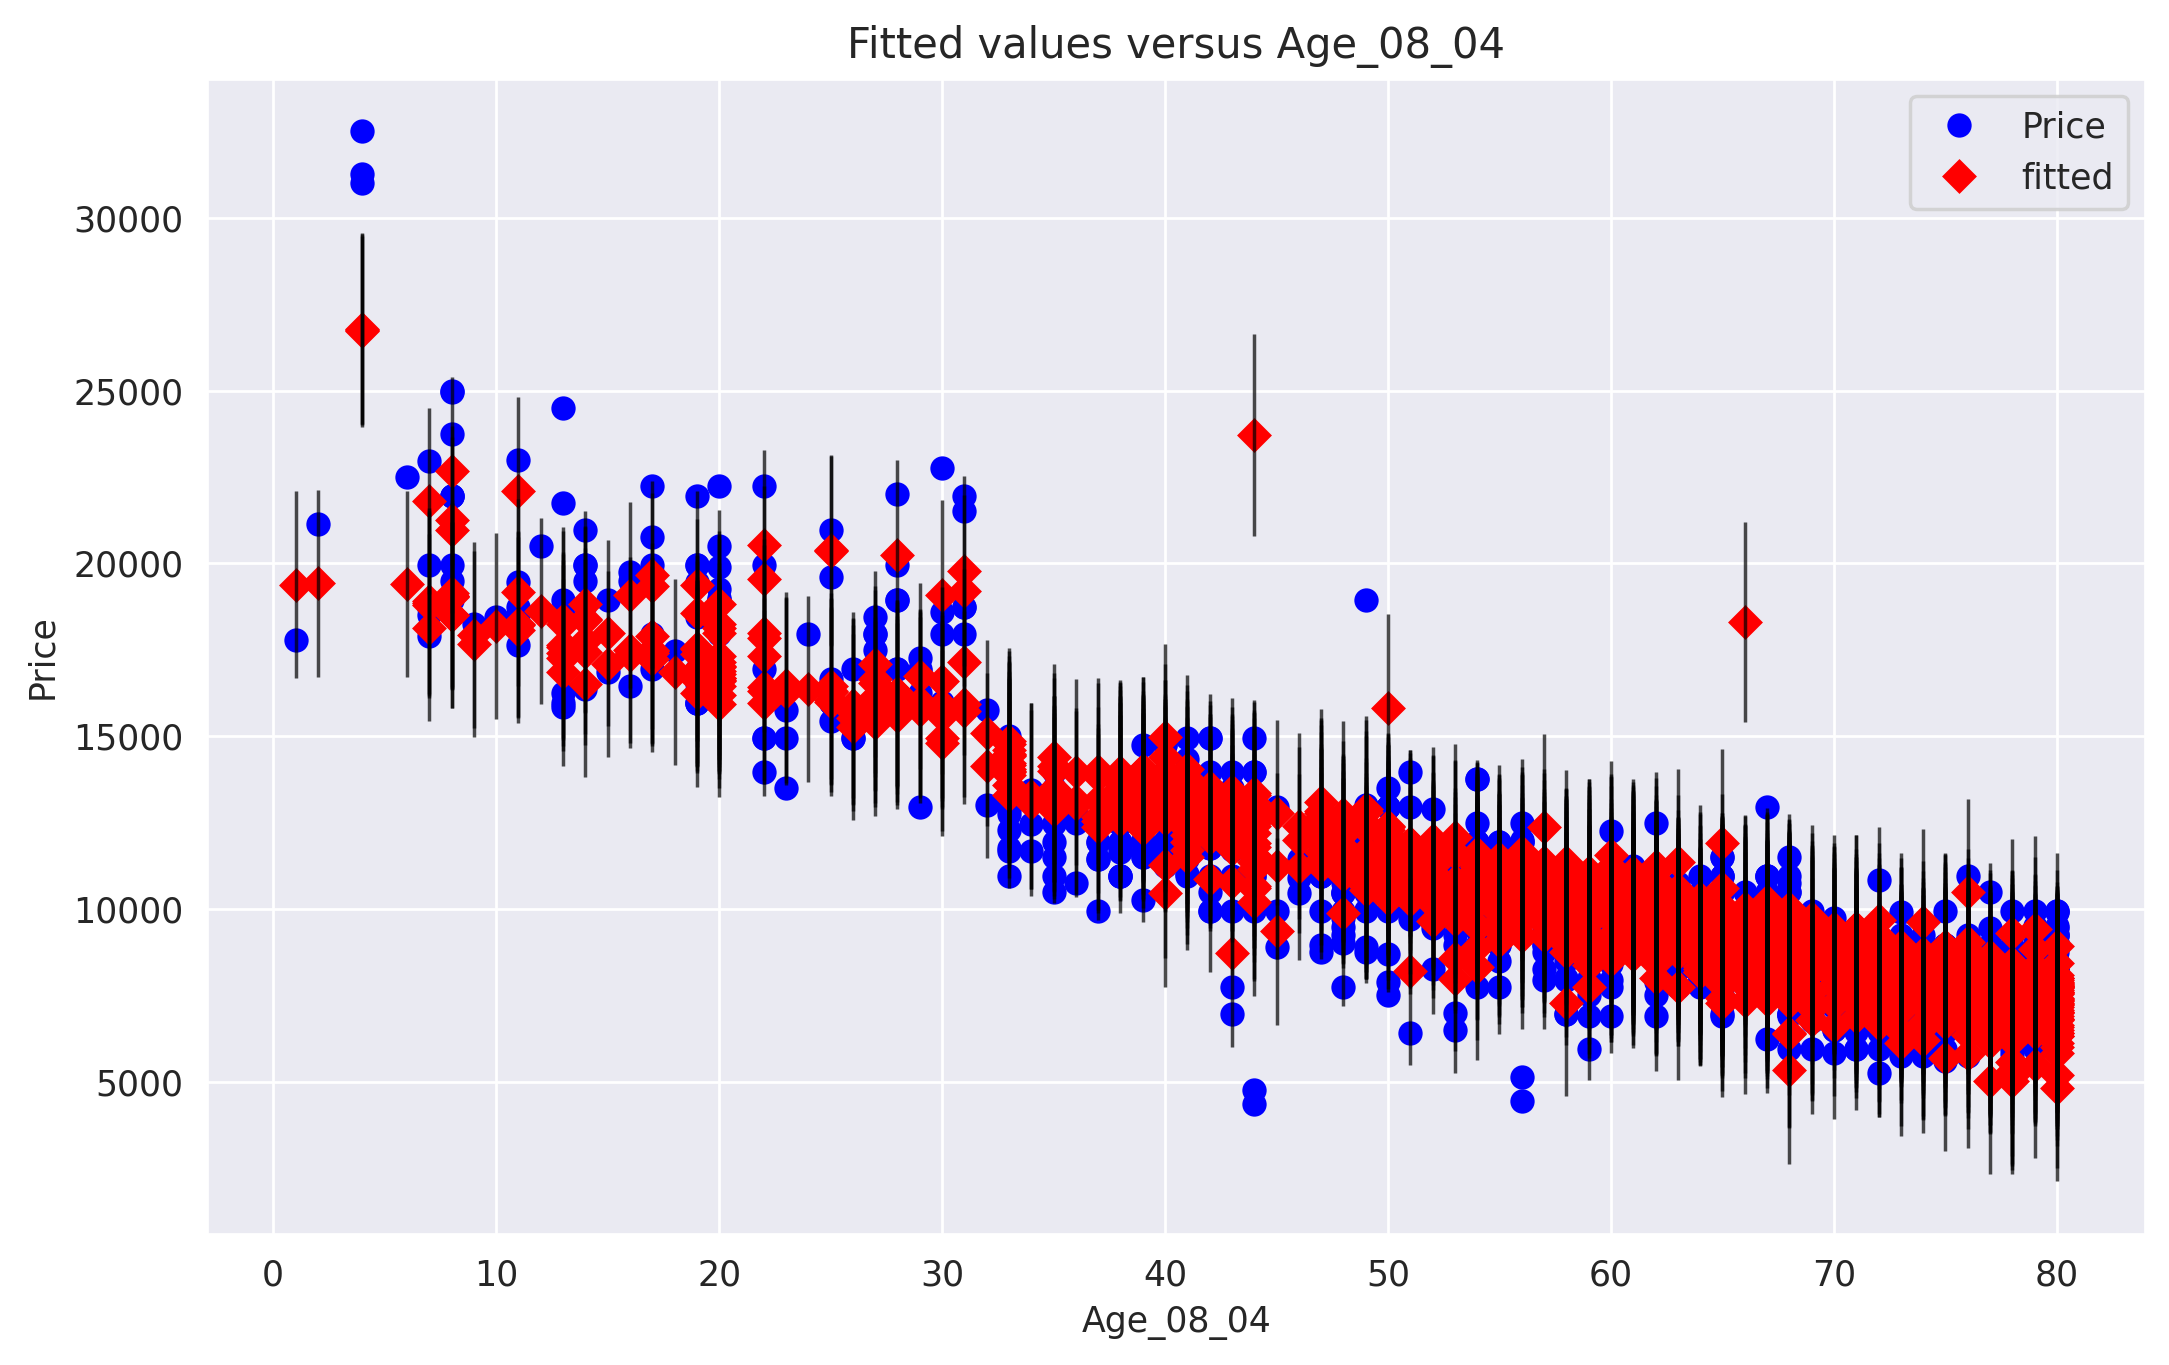

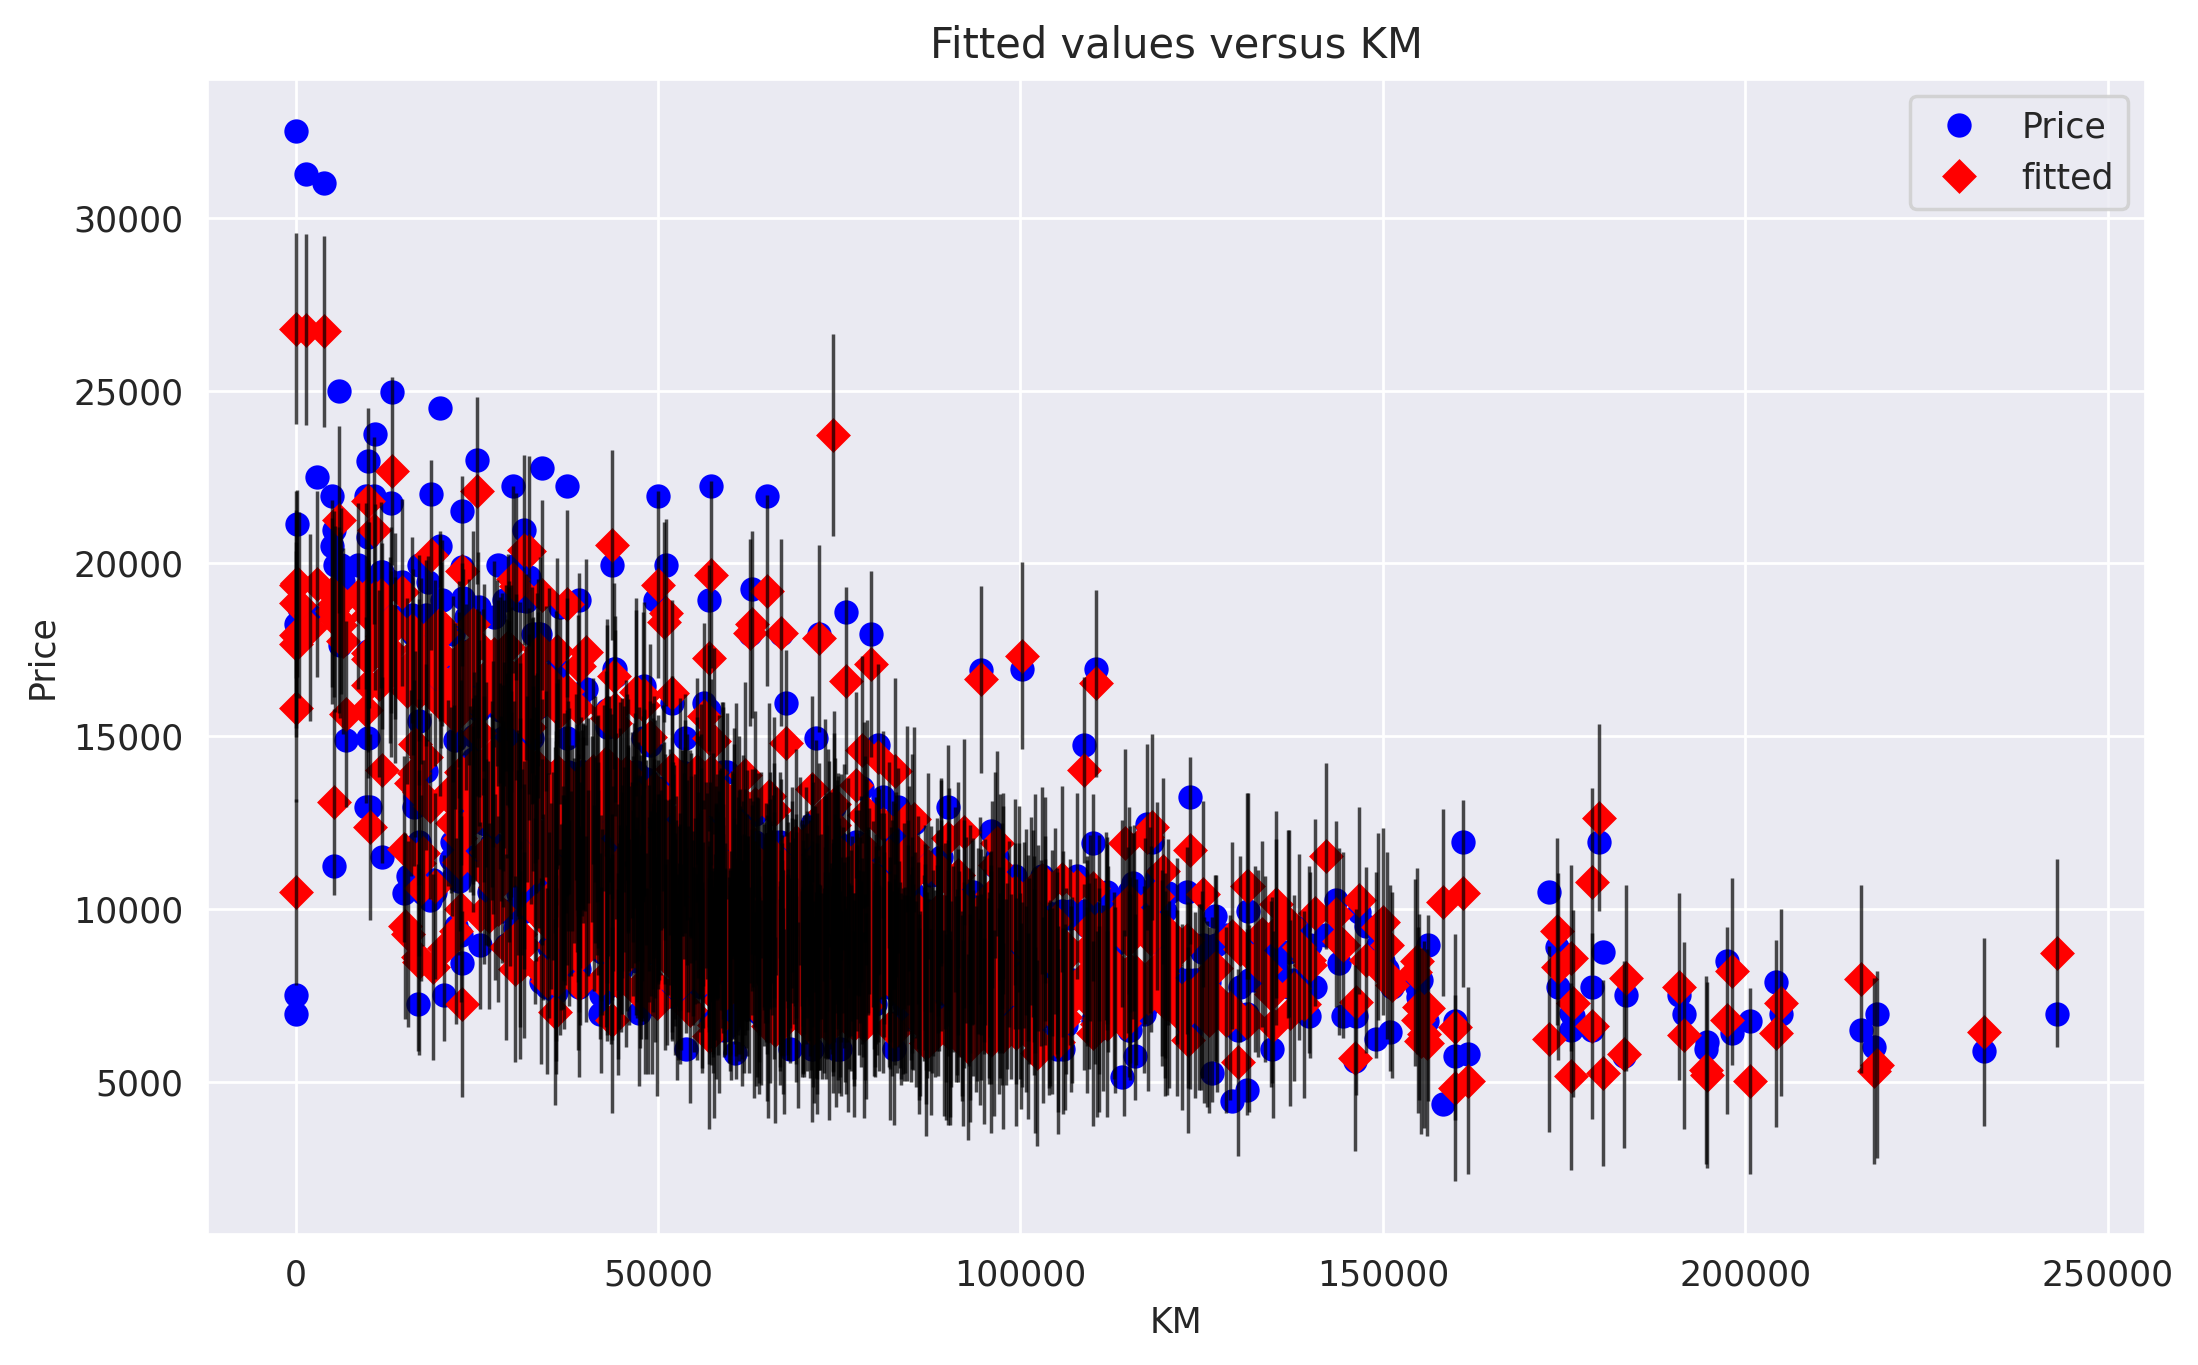

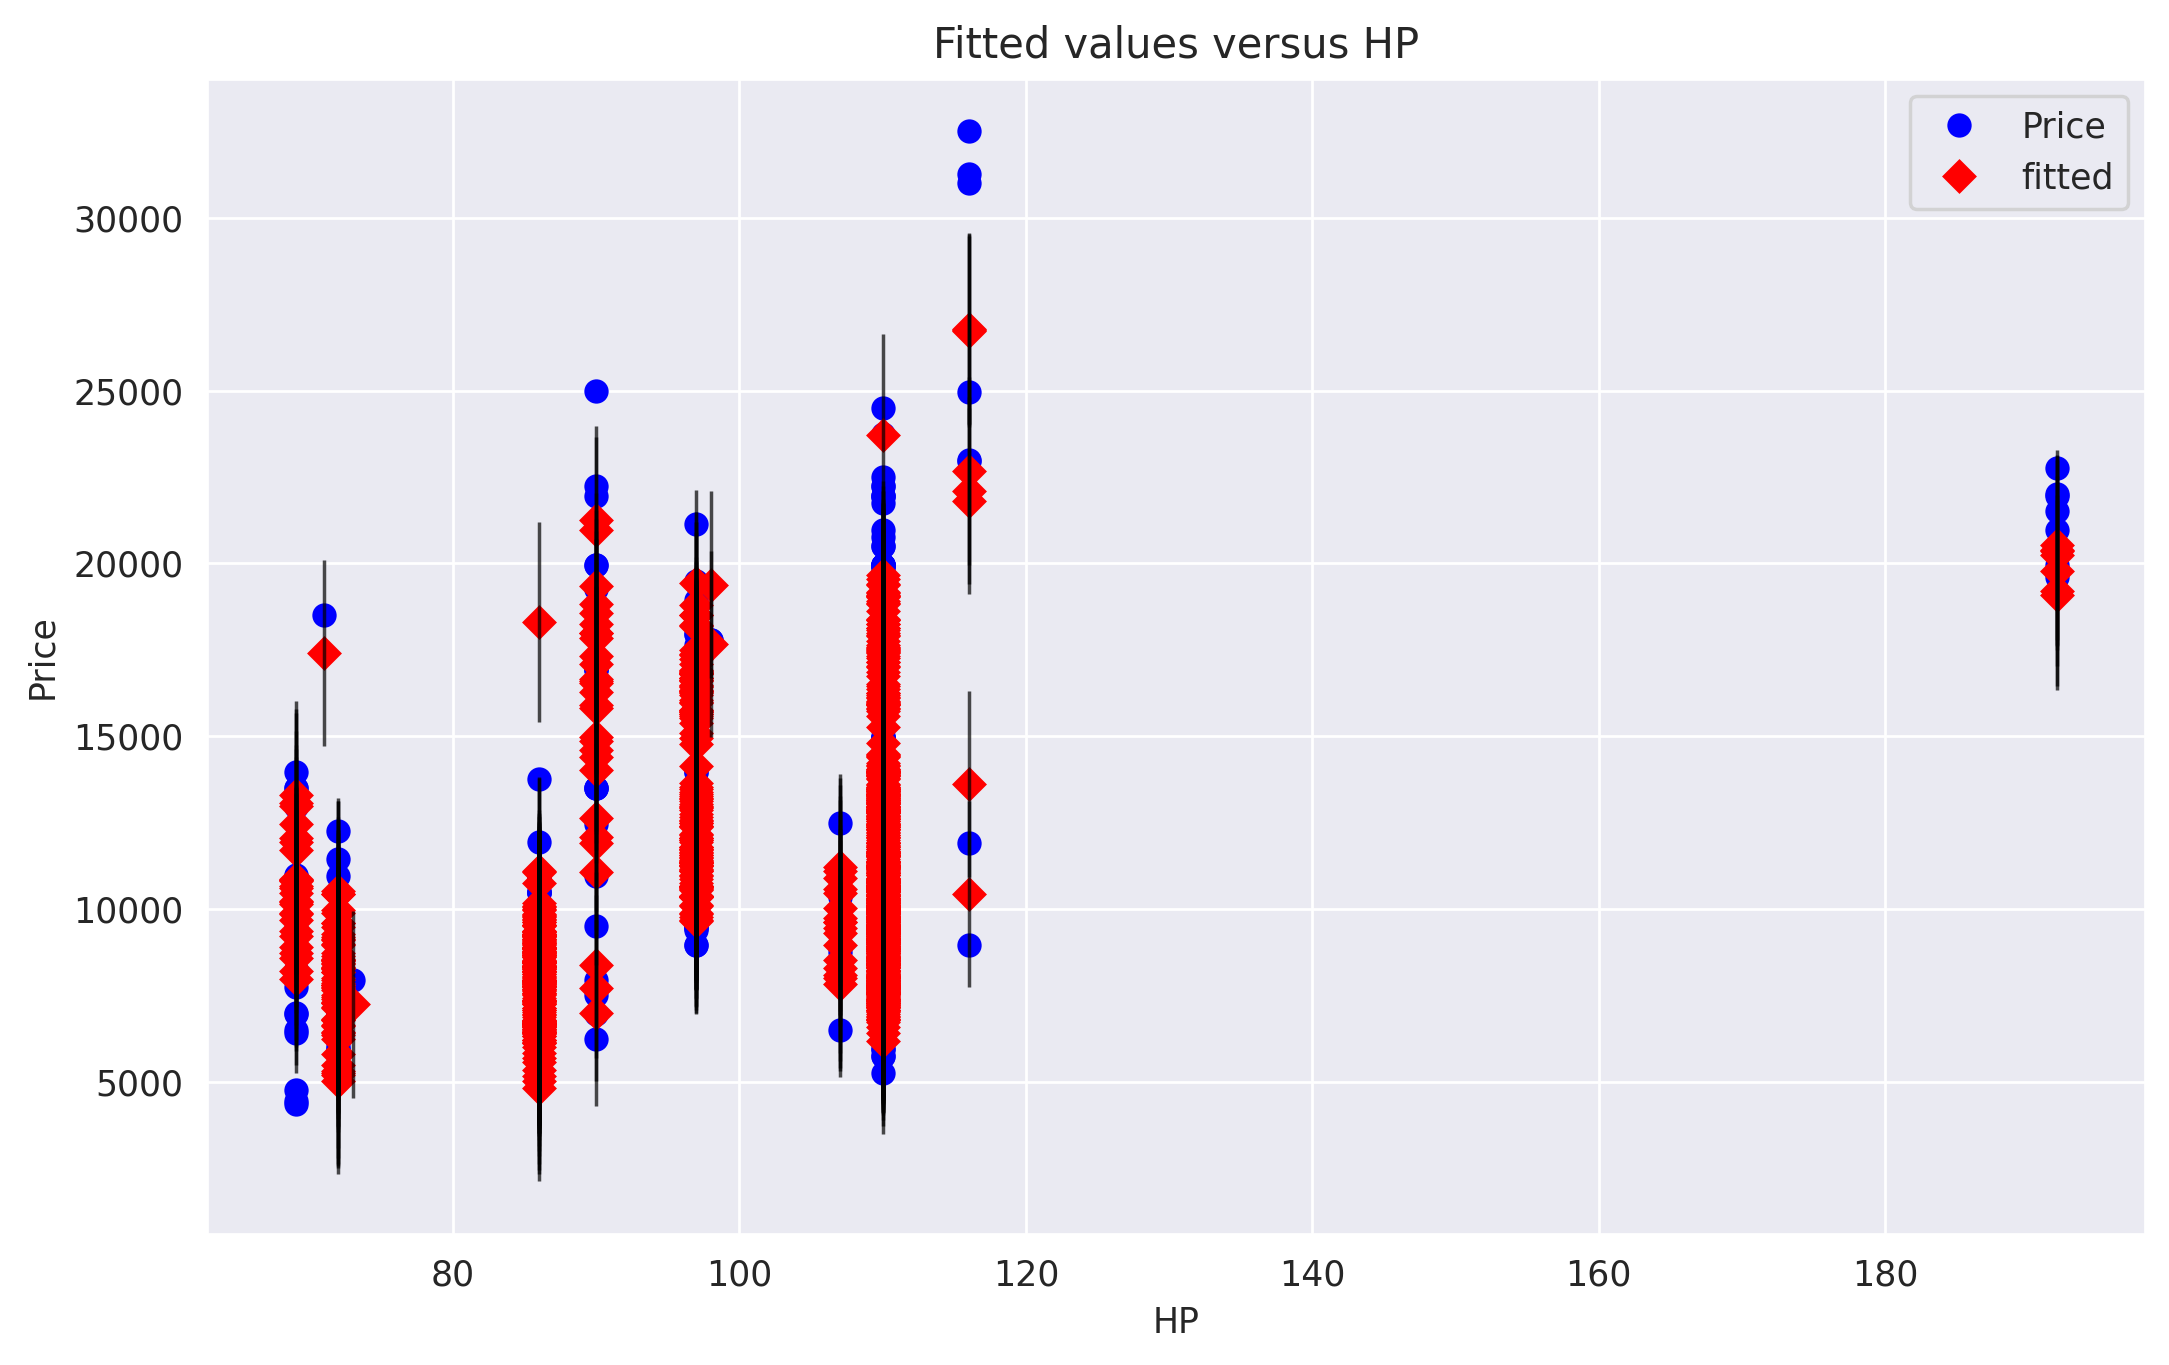

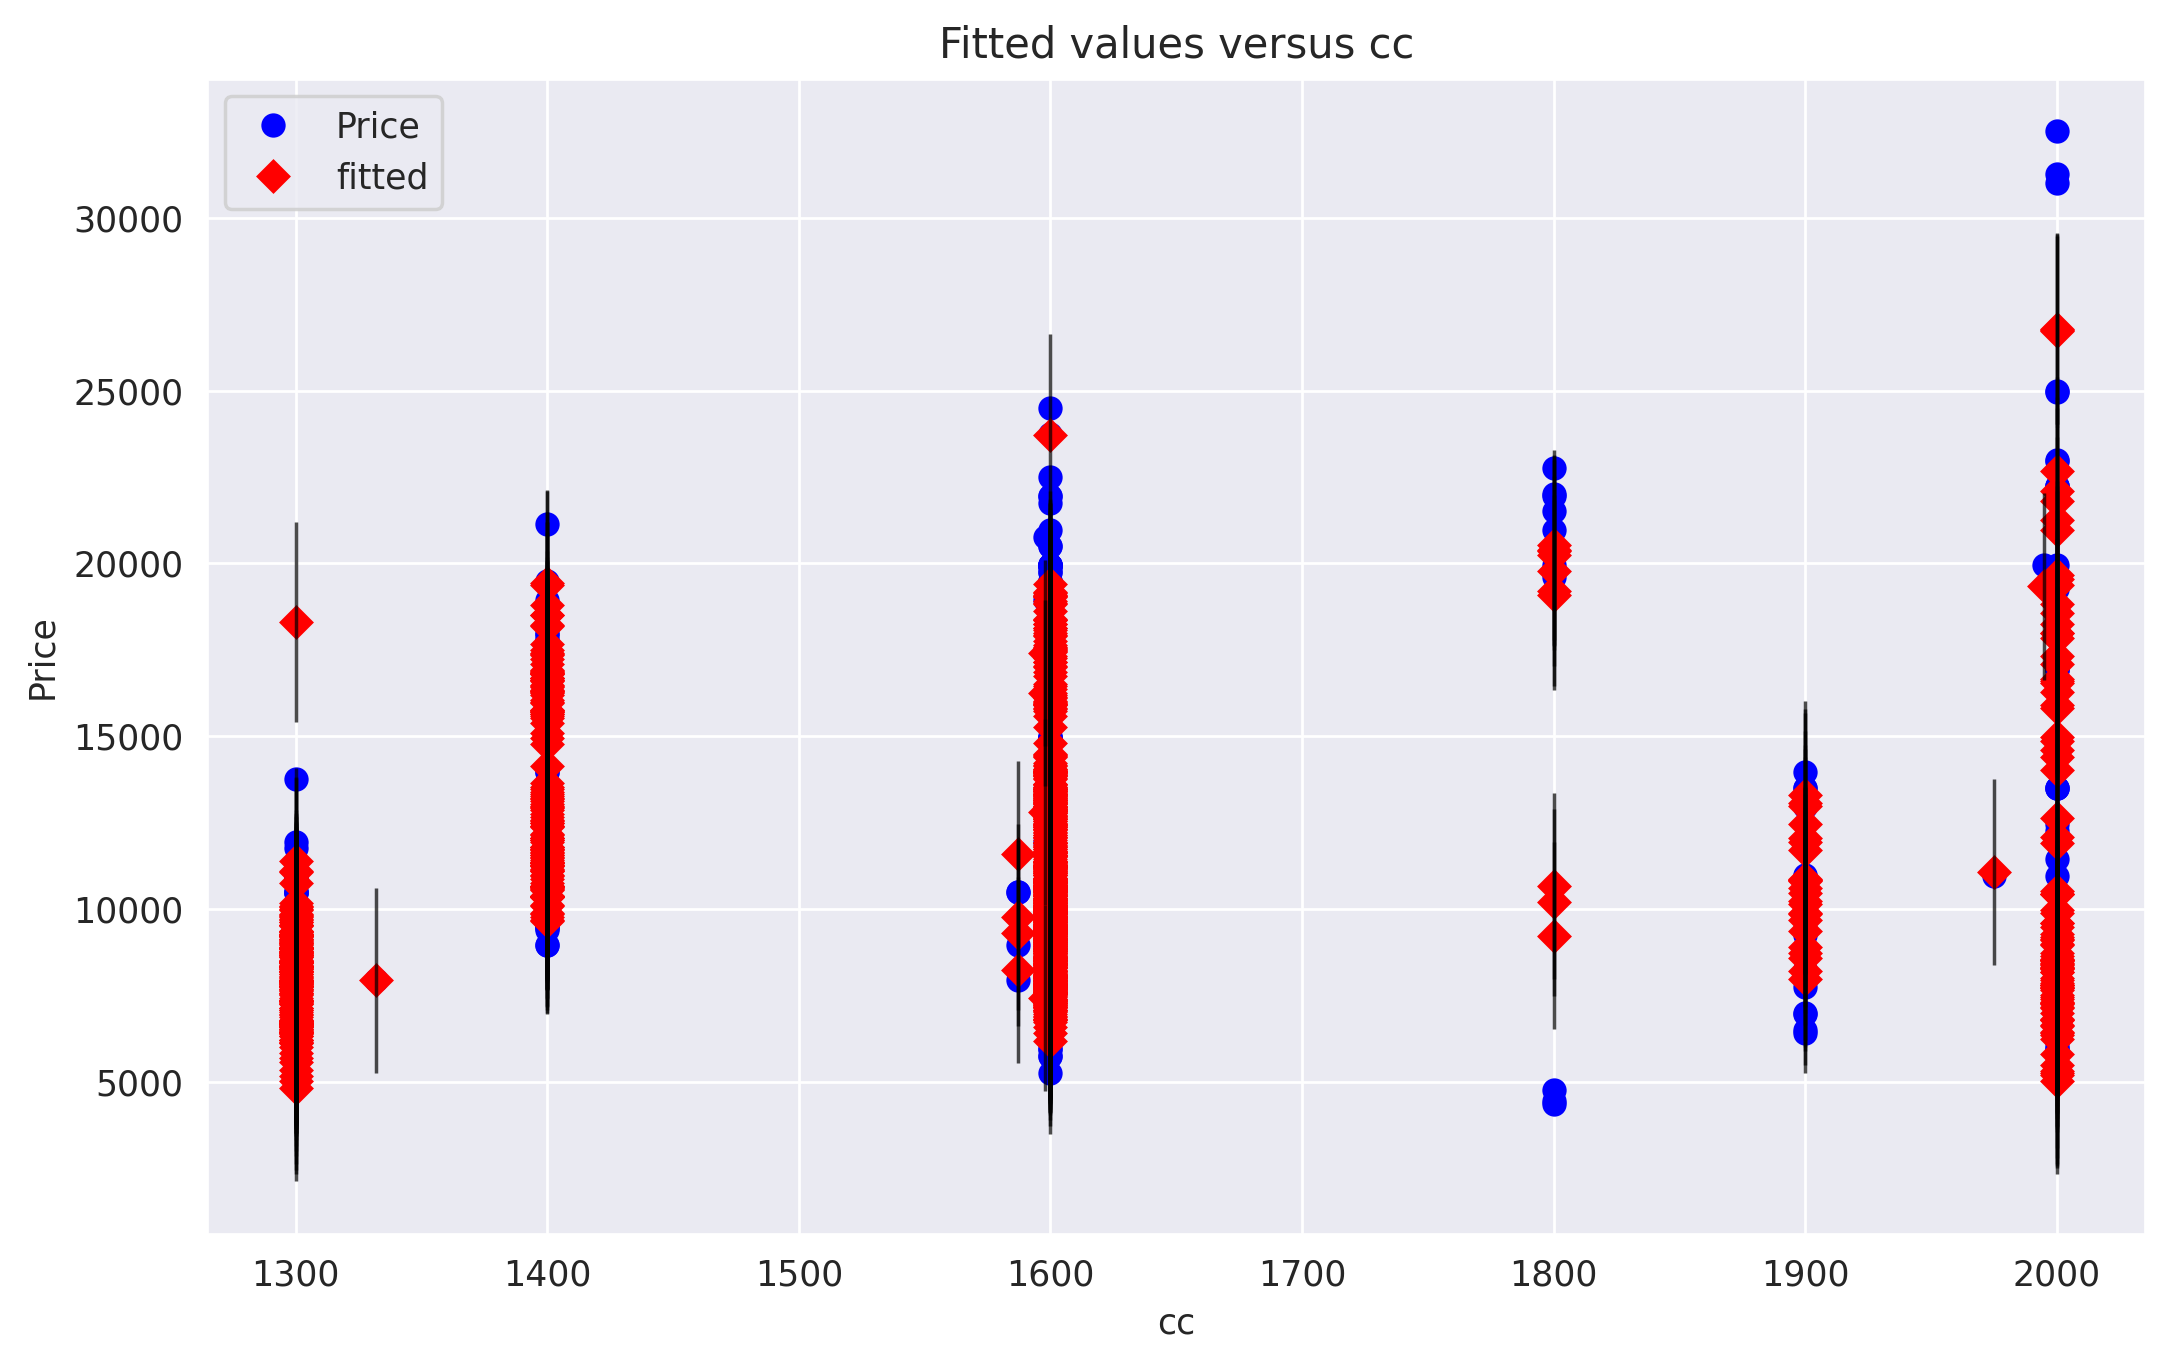

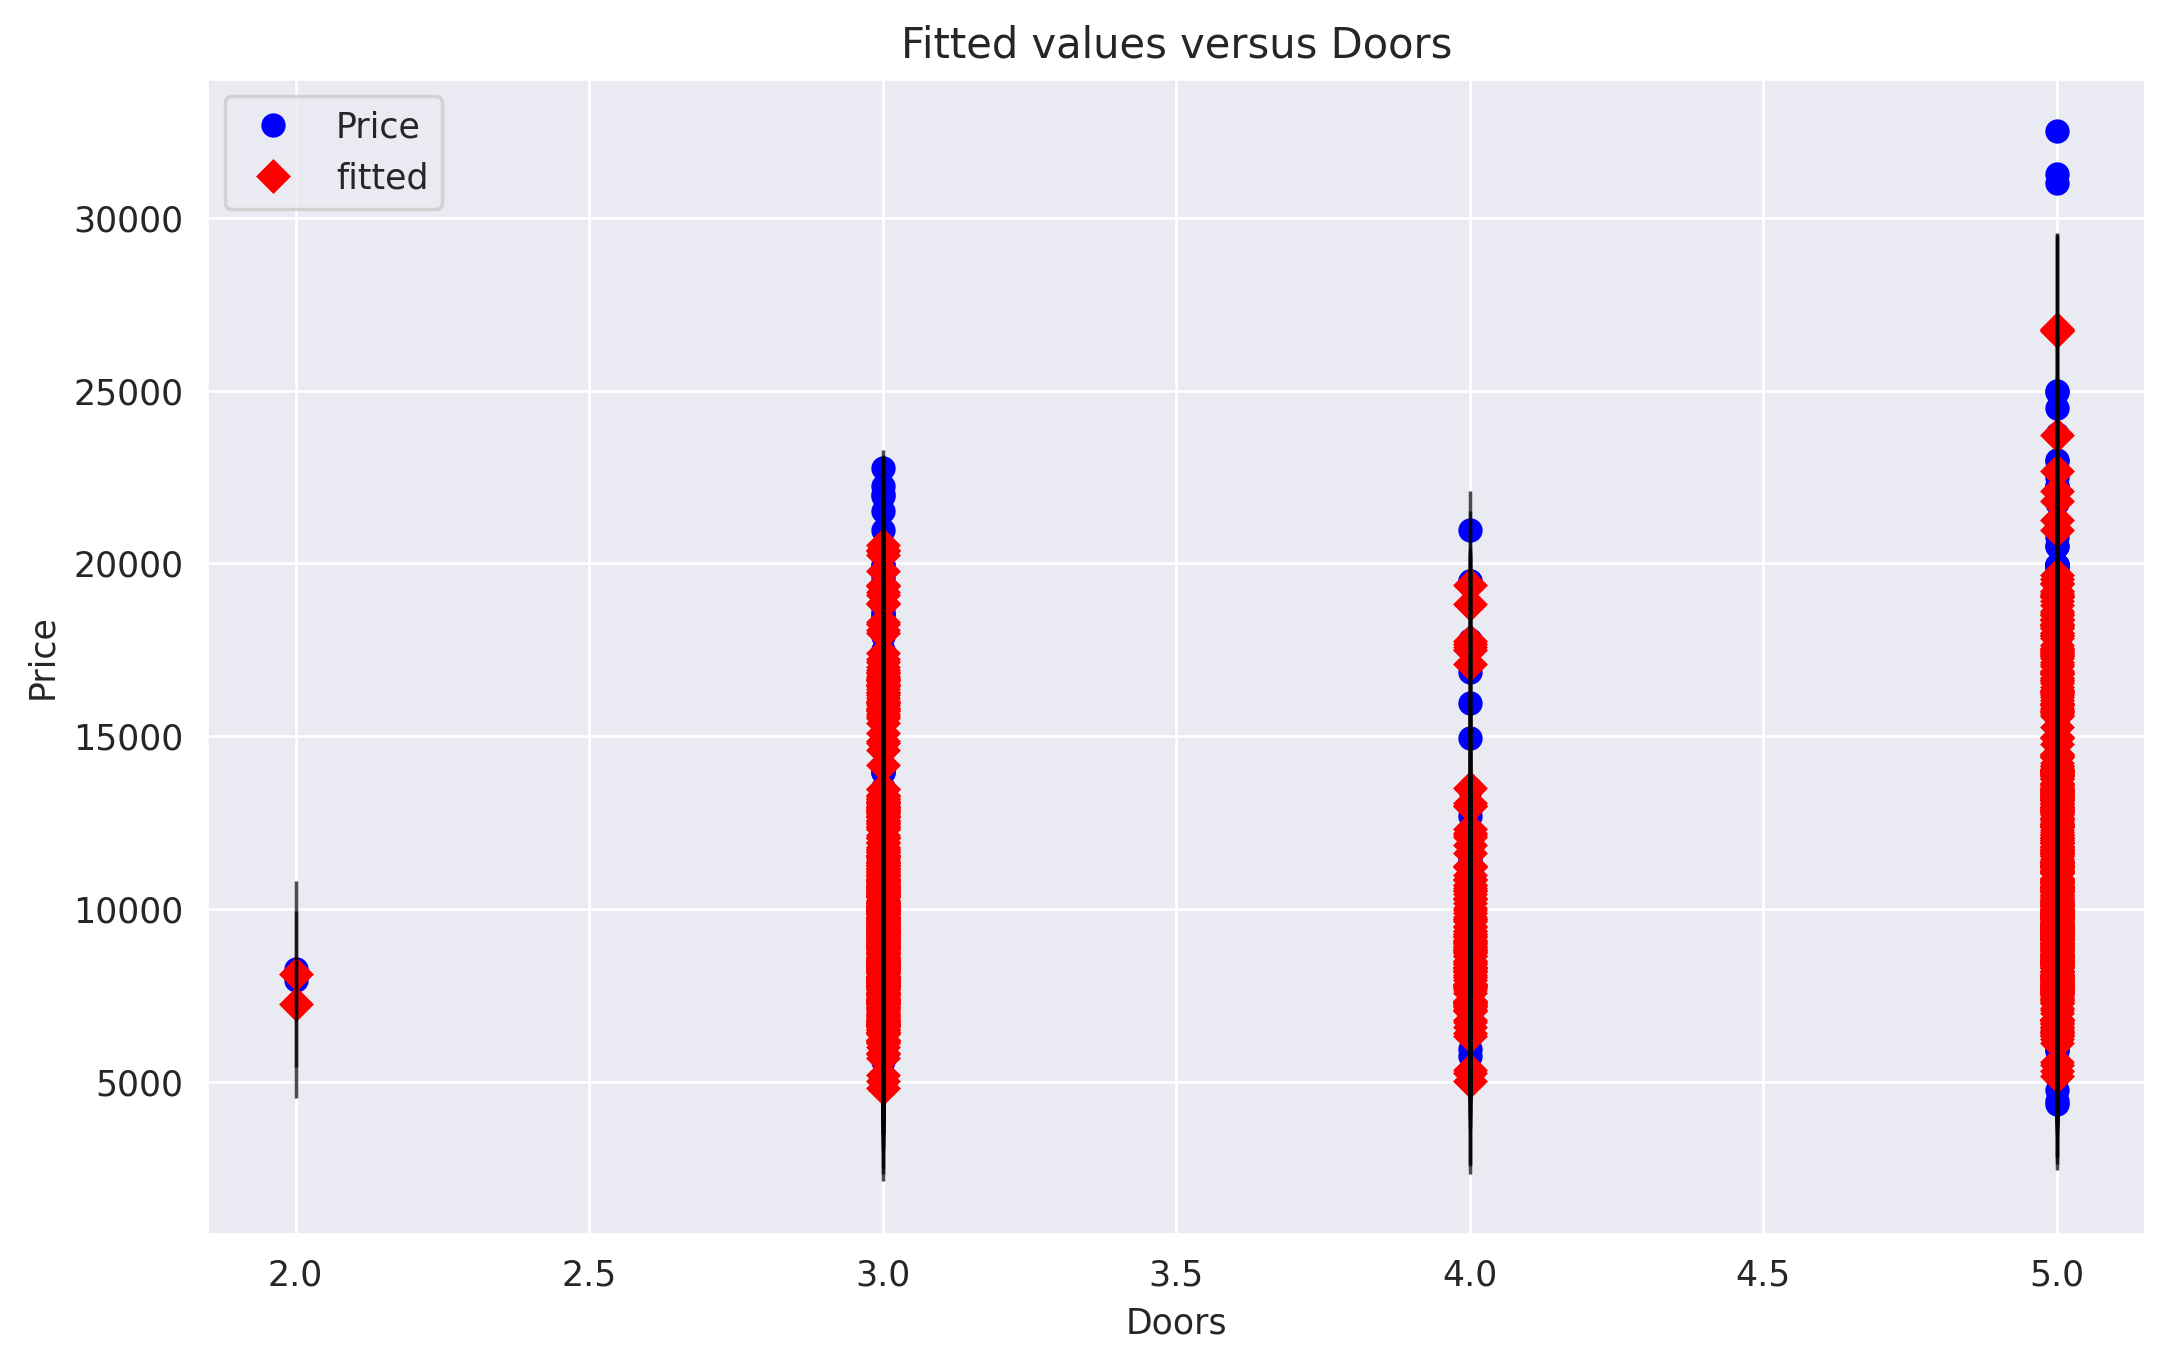

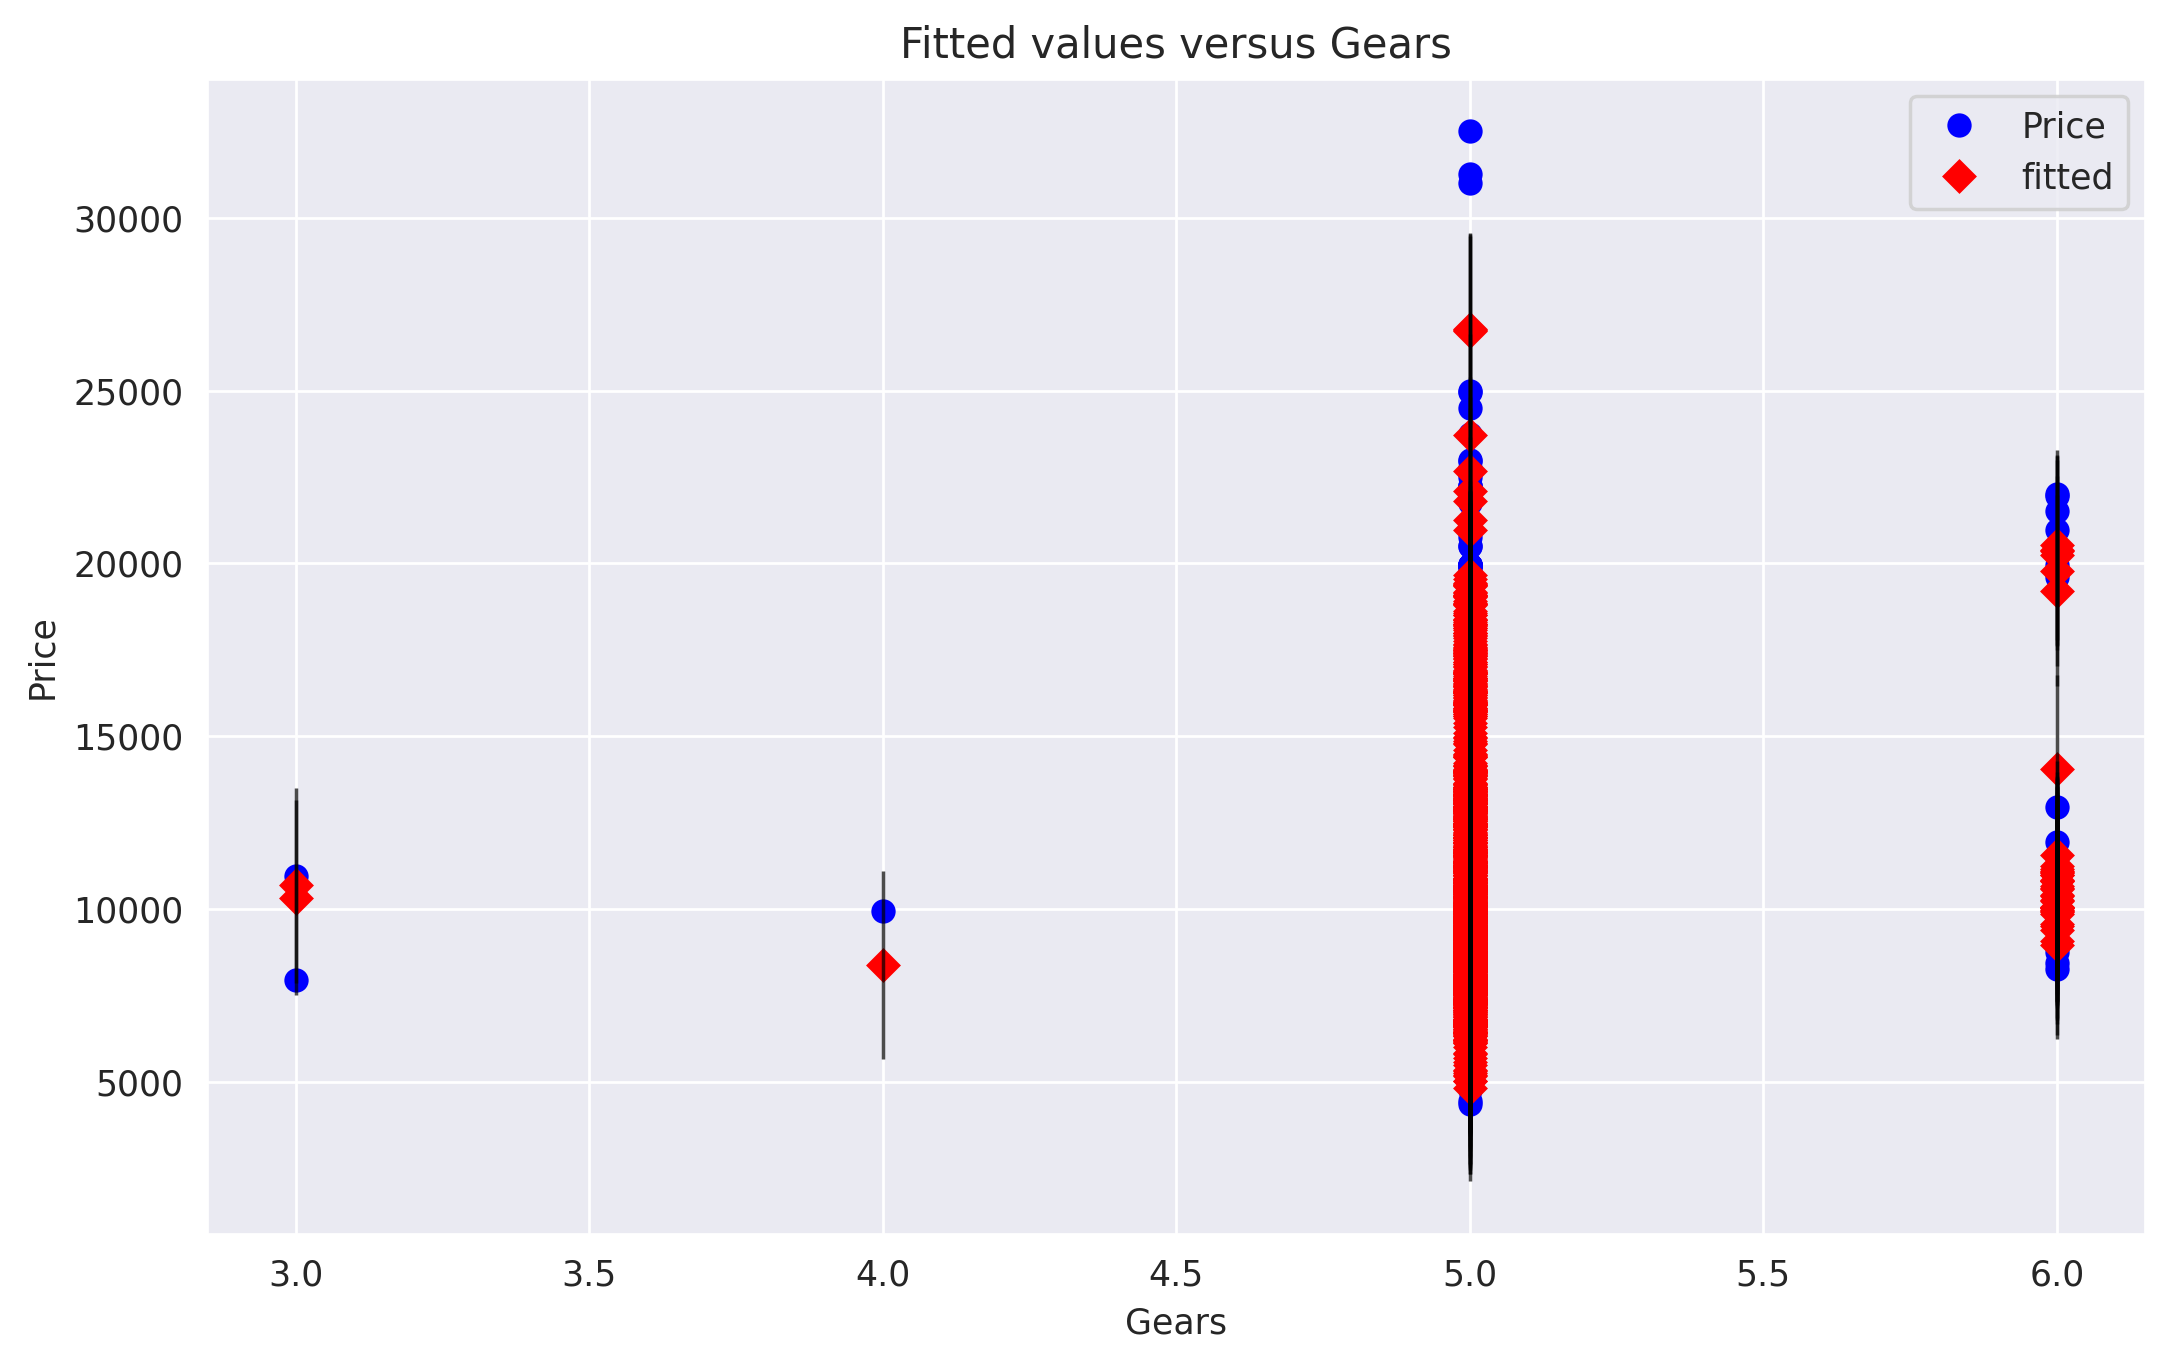

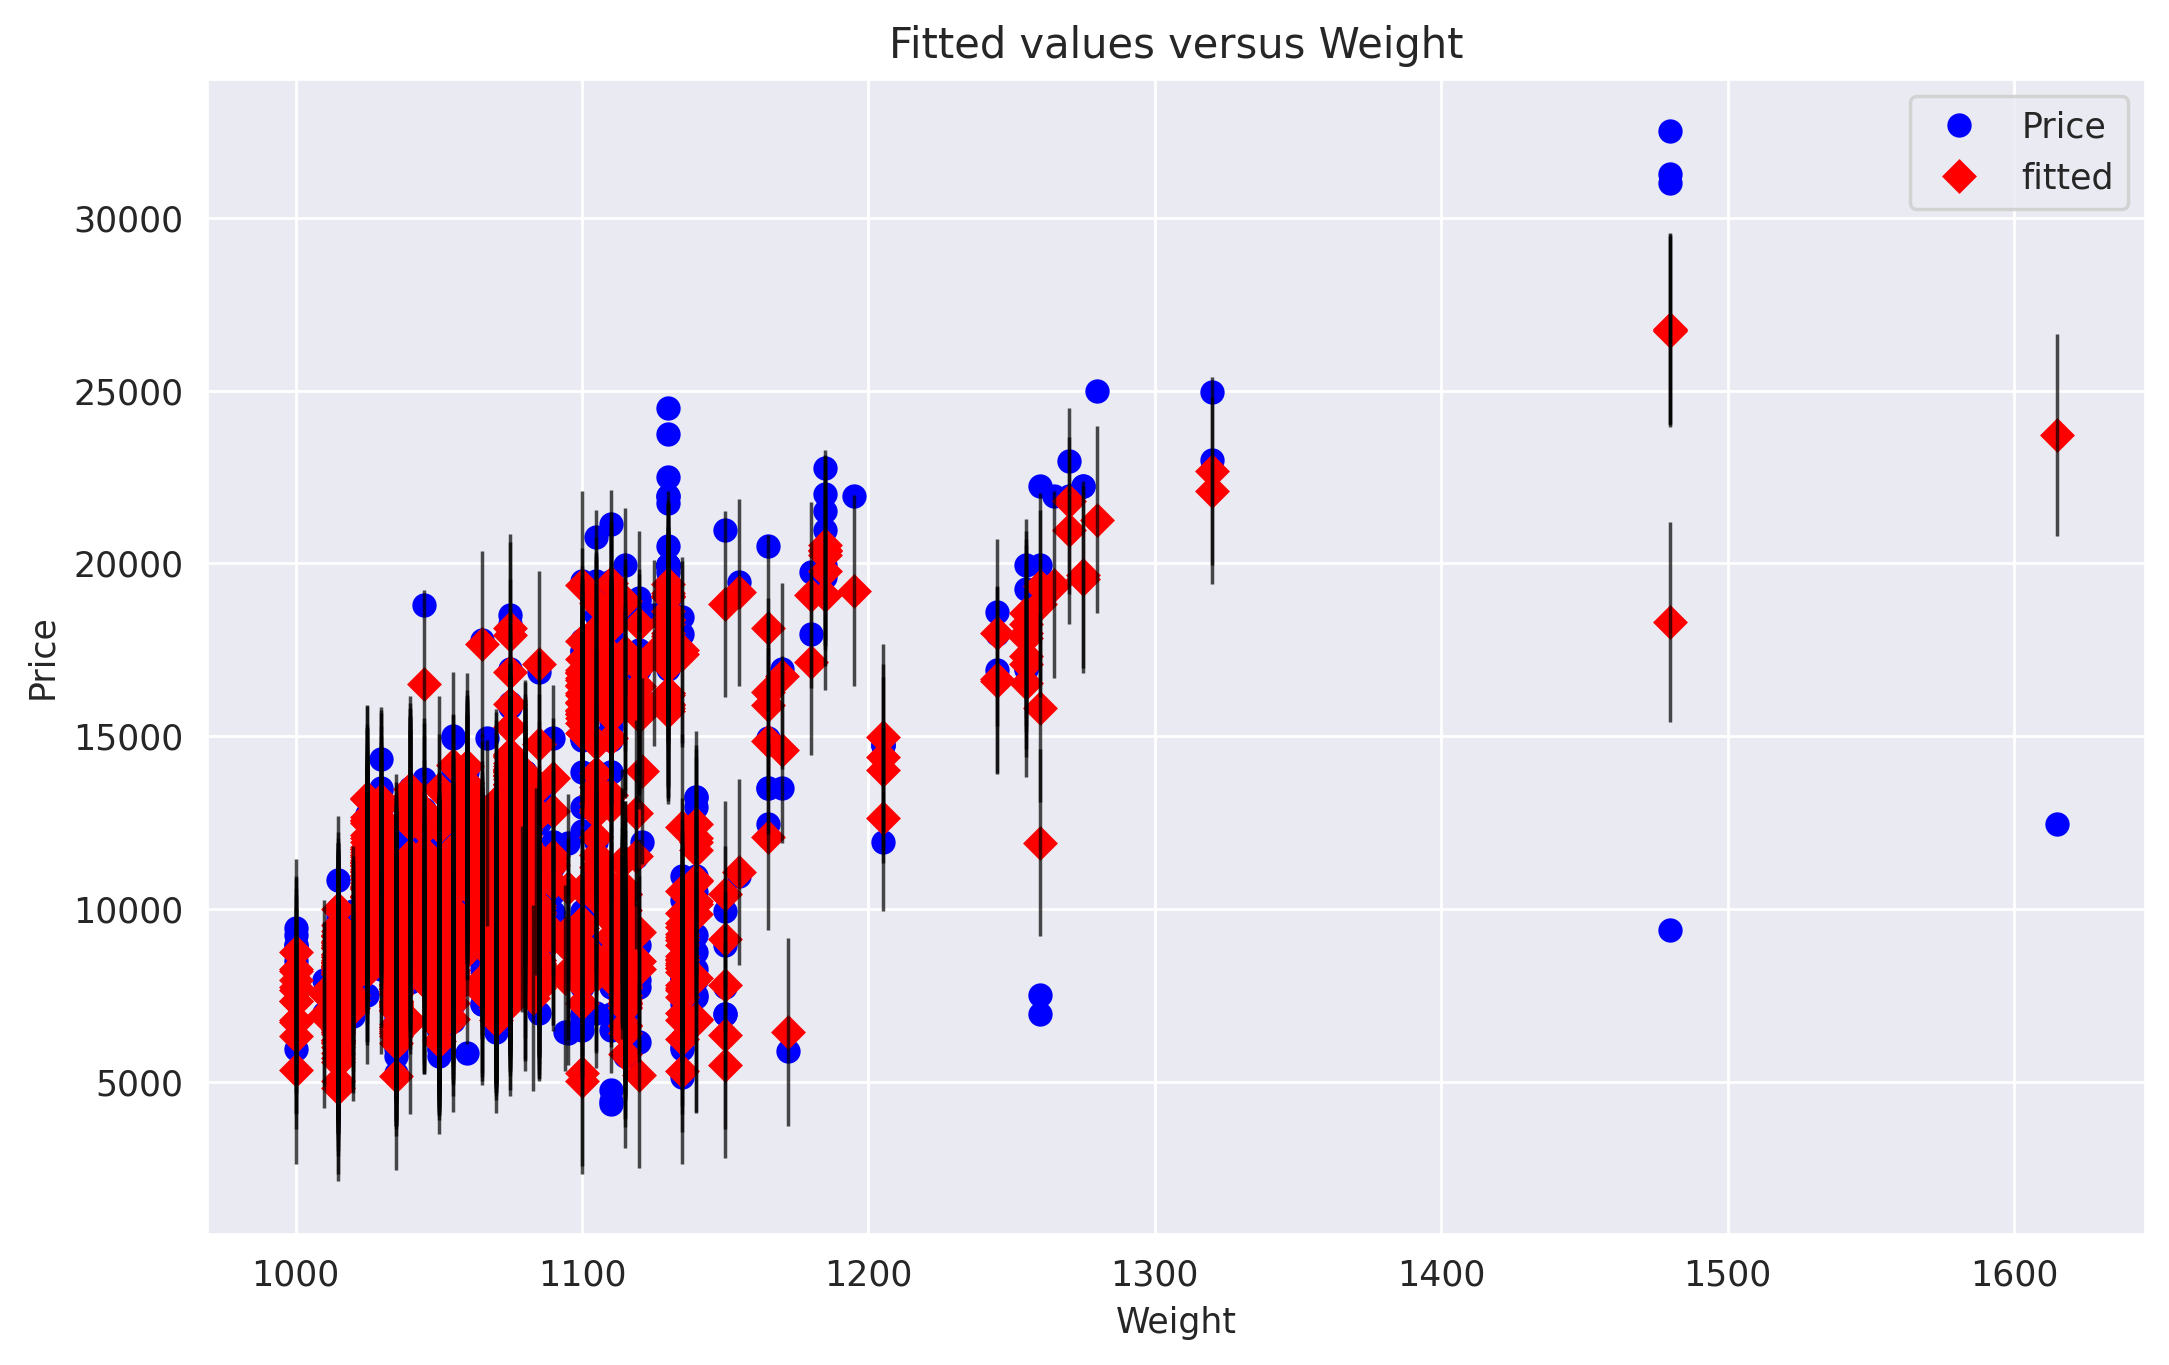

In [ ]:

sm.graphics.plot_fit(model,'Age_08_04');
sm.graphics.plot_fit(model,'KM');

sm.graphics.plot_fit(model,'HP');
sm.graphics.plot_fit(model,'cc');

sm.graphics.plot_fit(model,'Doors');

sm.graphics.plot_fit(model,'Gears');

sm.graphics.plot_fit(model,'Weight');



#Model deletion techniques

In [ ]:
#Find the influence data
inf=model.get_influence()
inf

In [ ]:
#Calculate cook's distance
c,p=inf.cooks_distance
c

array([7.01284120e-04, 2.96208652e-04, 6.03978974e-04, ...,
       1.38079652e-04, 3.26183482e-07, 1.02330010e-04])

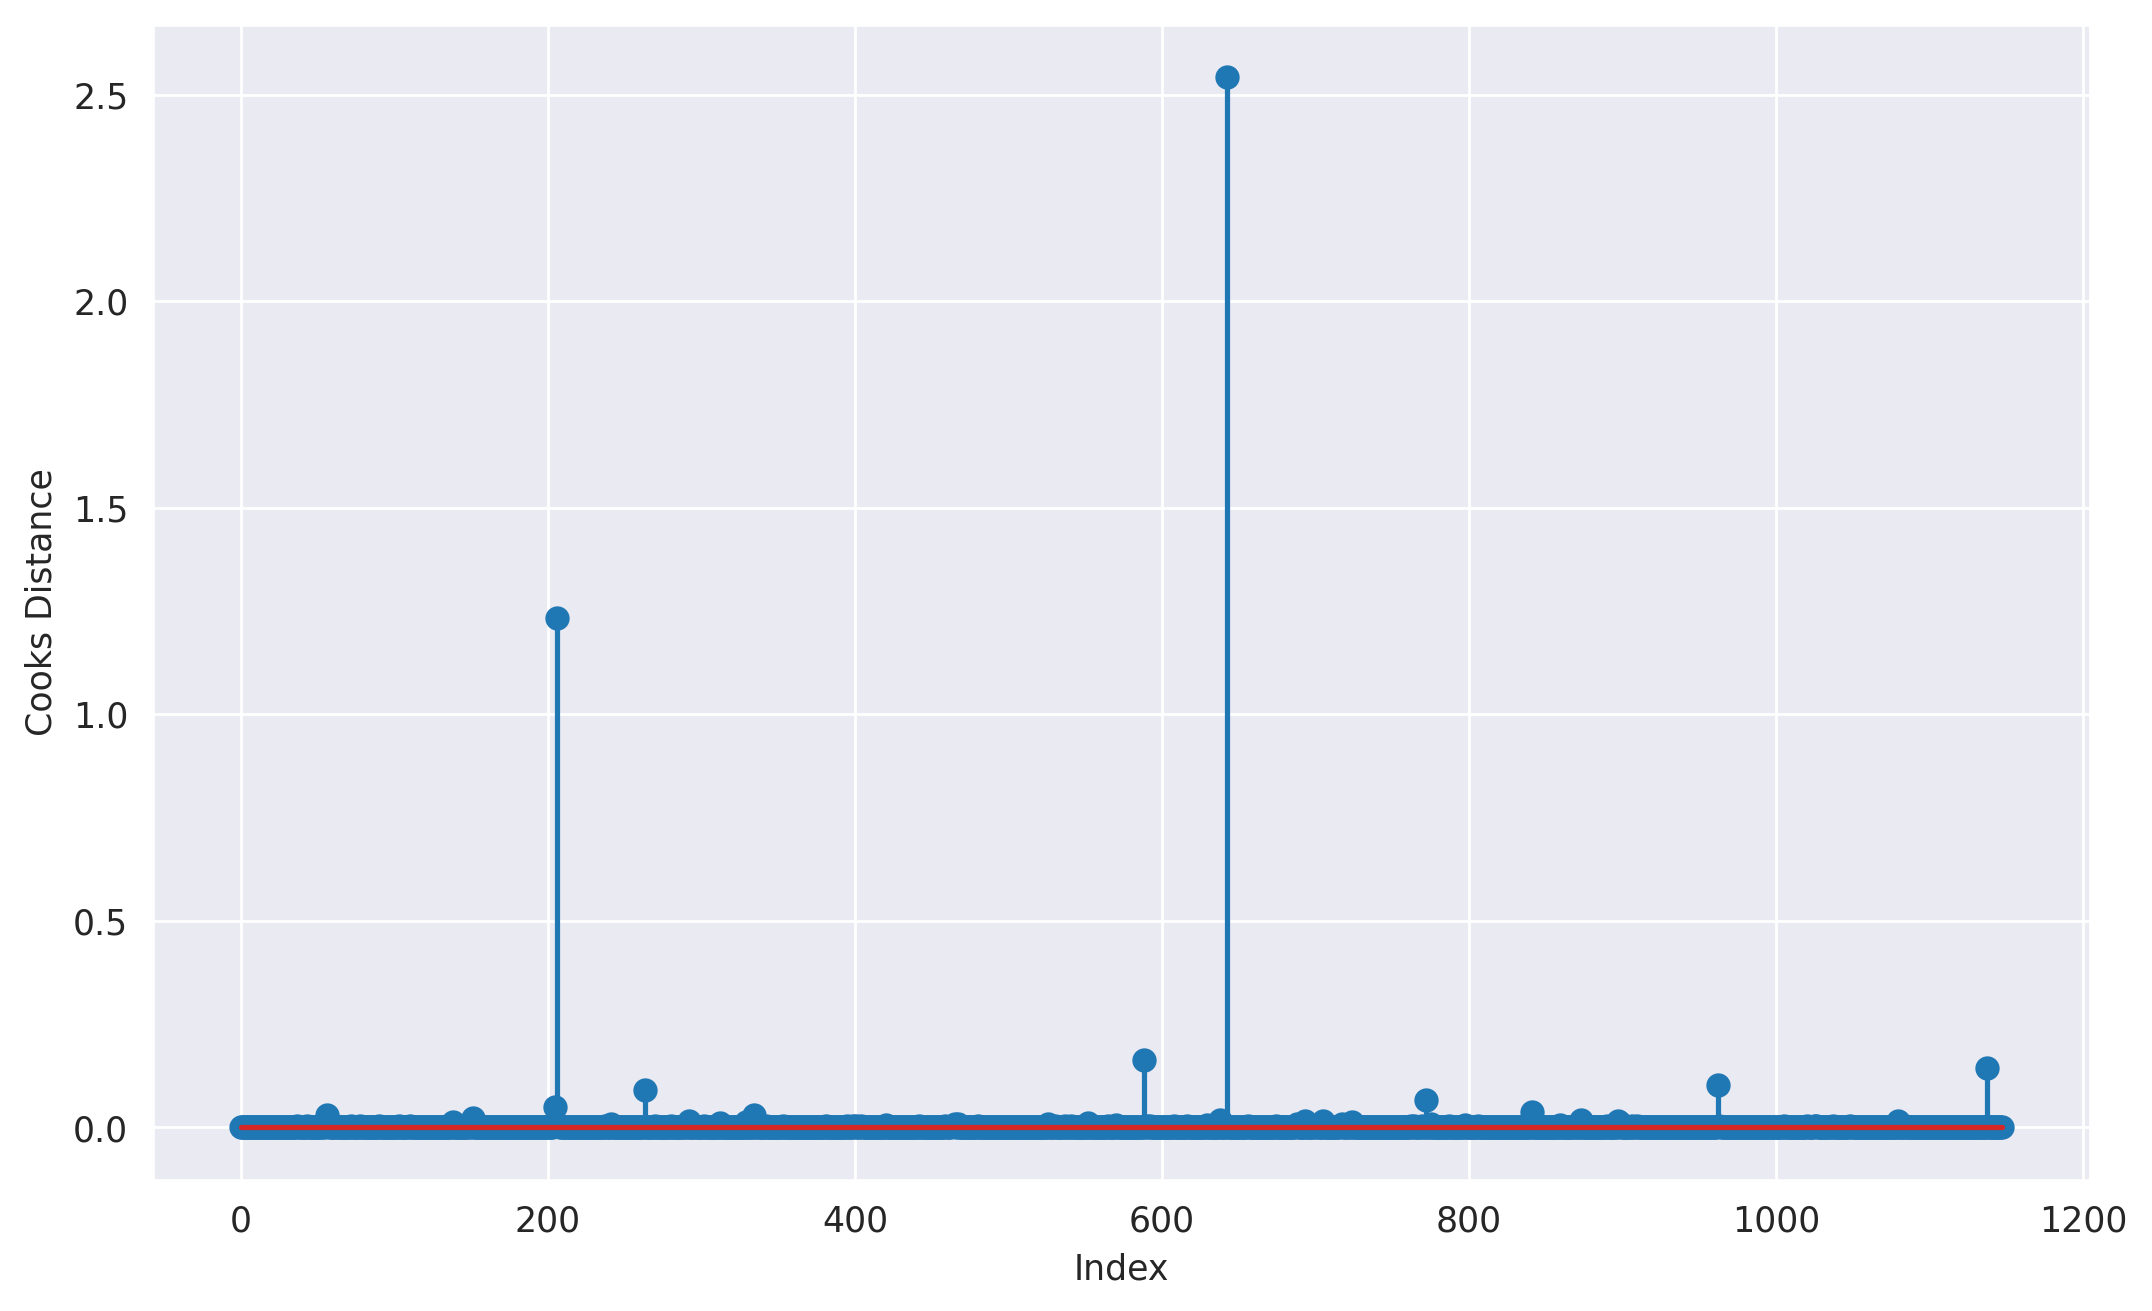

In [ ]:
#cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
np.argmax(c),np.max(c)

(642, 2.5422833056104266)

In [ ]:
train_data.iloc[[642,897]]

Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  Gears  Weight  \
221         44  74172    Petrol  110          0  1600      5      5    1615   
147         13  19988    Petrol  110          0  1600      5      5    1130   

     Price  
221  12450  
147  24500

#Influence plot

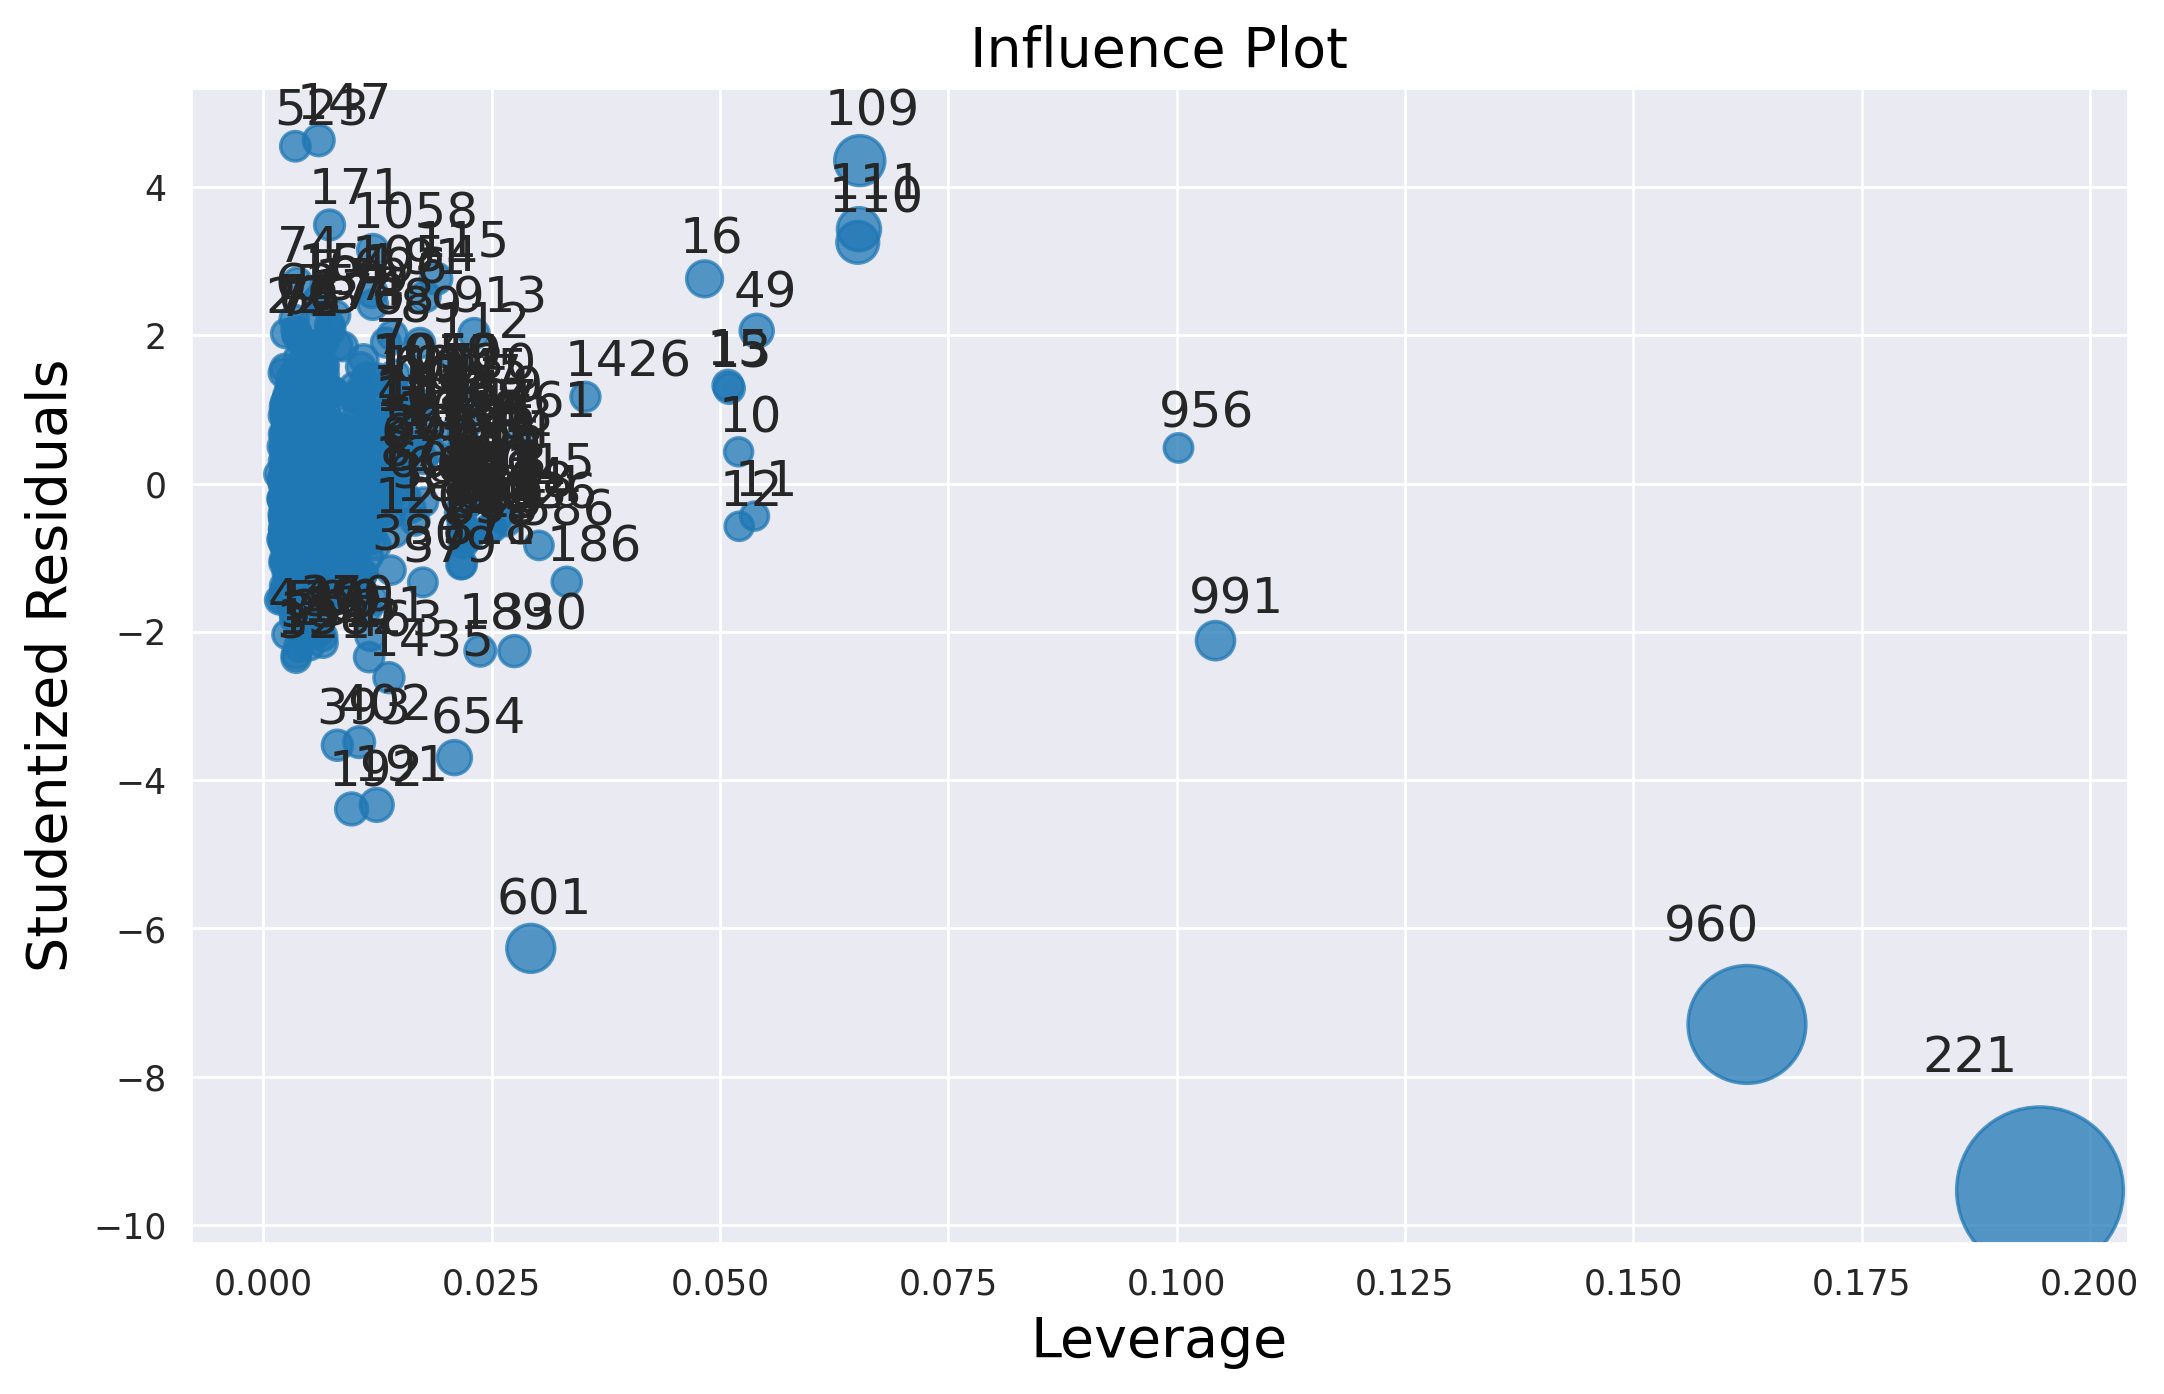

In [ ]:
import statsmodels as sm
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

#Calculate cutoff

In [ ]:
k=len(train_data.columns)
n=len(train_data)
leverage=3*(k+1)/n
leverage

0.028745644599303136

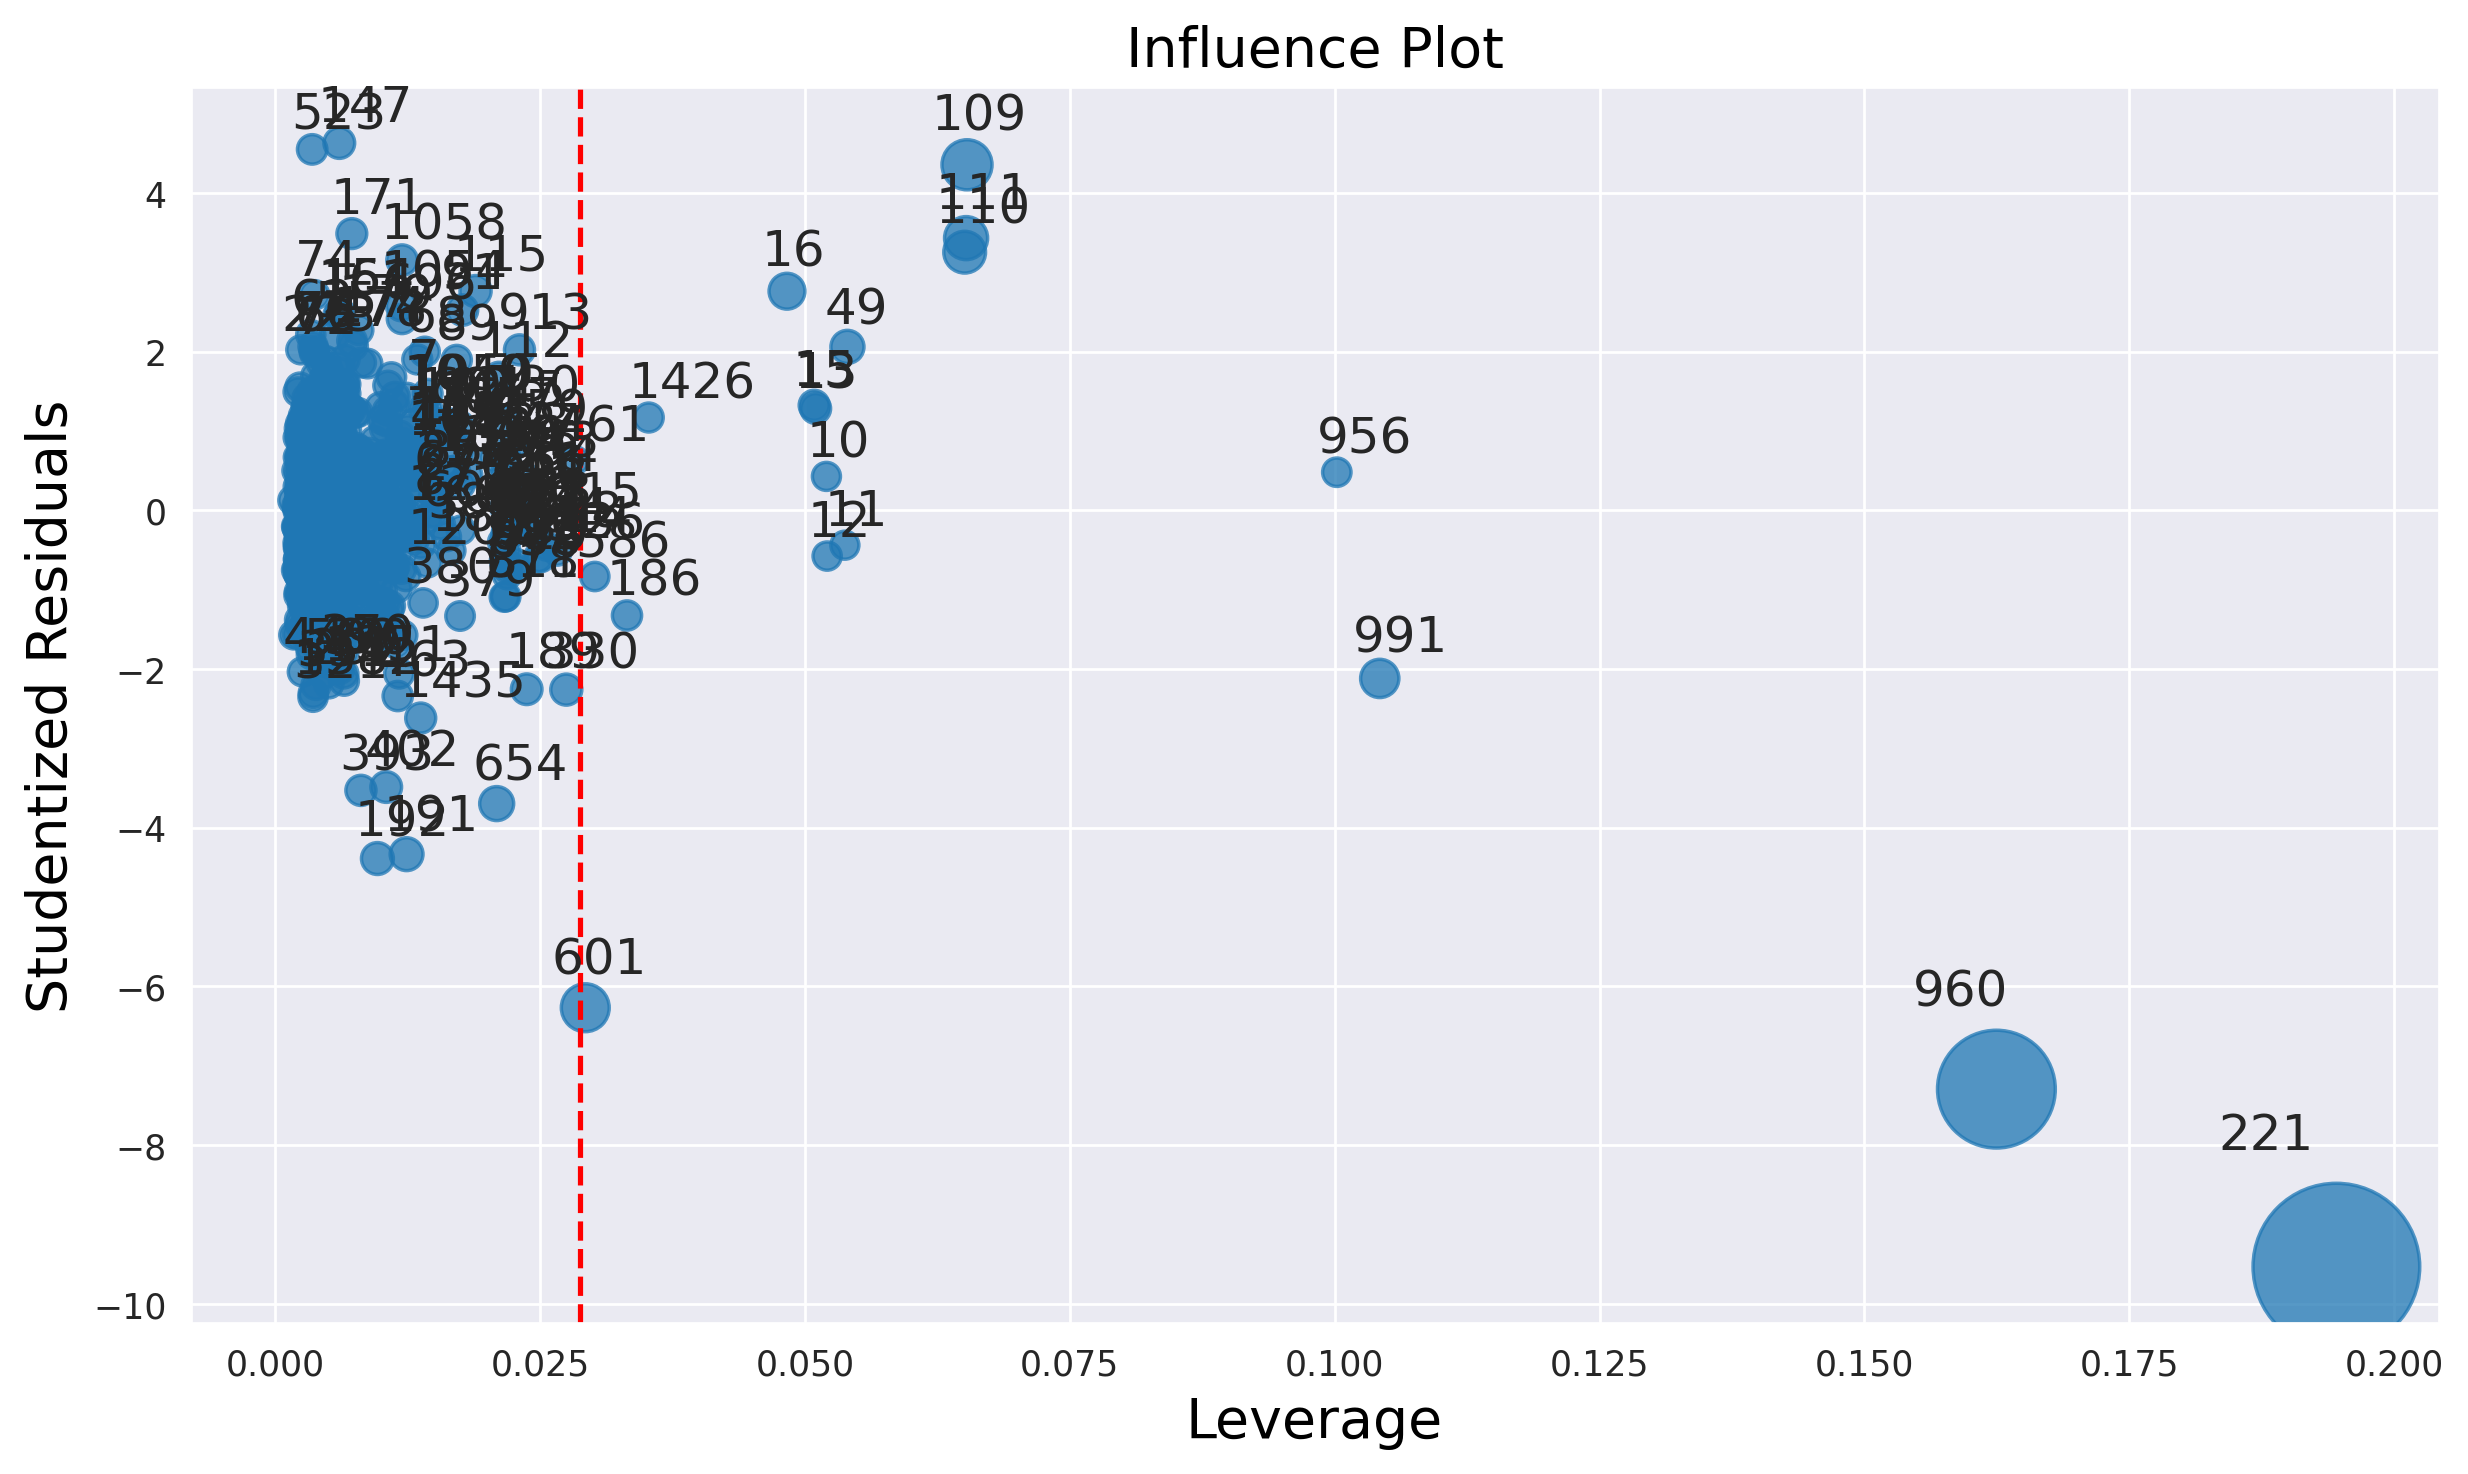

In [ ]:
influence_plot(model)
plt.axvline(x=leverage,linestyle='--',color='red')
plt.tight_layout()
plt.show()

In [ ]:
train_data.iloc[[206,642]]

Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  Gears  Weight  \
960         66  50806    Petrol   86          0  1300      3      5    1480   
221         44  74172    Petrol  110          0  1600      5      5    1615   

     Price  
960   9390  
221  12450

#Improving the model

In [ ]:
# Drop rows with original indices 206 and 642
train_data.drop(index=train_data.index[[206, 642]], inplace=True)
# Reset the index after dropping rows and drop the old index
train_data.reset_index(drop=True, inplace=True)

In [ ]:
final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=train_data).fit()
final_model.rsquared

0.8799391244965465

In [ ]:
inf=final_model.get_influence()
c,p=inf.cooks_distance
c

array([6.64835358e-04, 1.36165909e-04, 8.04399165e-04, ...,
       1.11935669e-04, 2.73677040e-05, 9.75547783e-05])

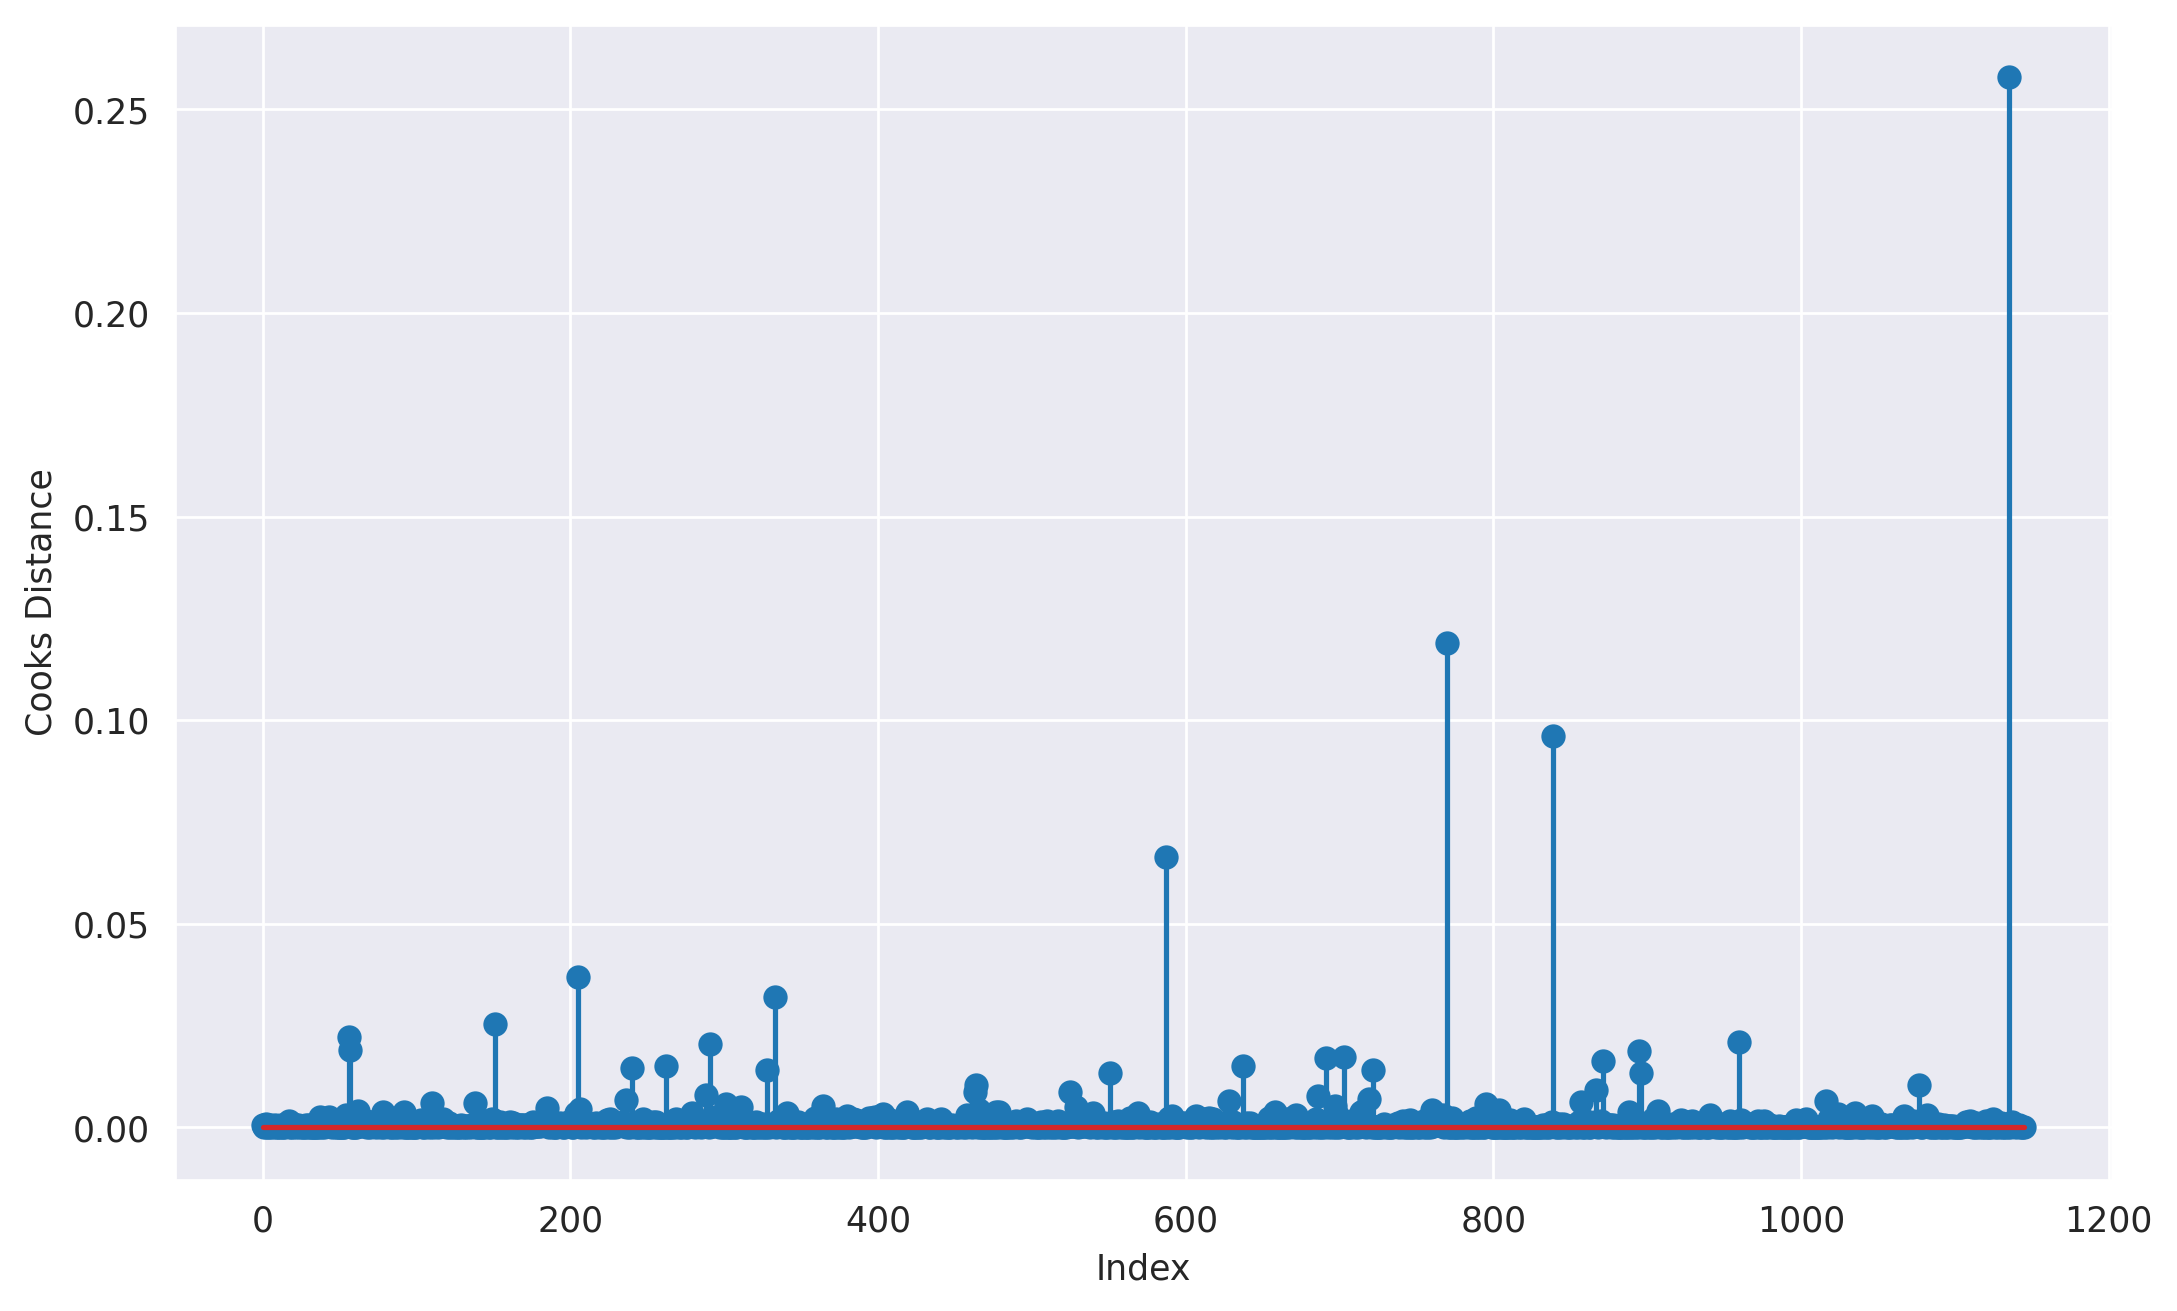

In [ ]:
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cooks Distance')
plt.show()

As cook's distance is <1 we can stop the diagnostics

#Predicting for new records

In [ ]:
X_test.reset_index(drop=True, inplace=True)
X_test

Age_08_04      KM  Fuel_Type   HP  Automatic    cc  Doors  Gears  Weight
0           63  115000          0  110          0  1600      3      5    1109
1           48   98100          1   69          0  1900      5      5    1140
2           41   29056          2   97          0  1400      5      5    1060
3           78   71186          2  110          0  1600      3      5    1050
4           54   62519          2   97          0  1400      3      5    1025
..         ...     ...        ...  ...        ...   ...    ...    ...     ...
282         79  207114          0  110          0  1600      5      5    1114
283         65   36000          2  110          0  1600      3      6    1065
284         51   50000          2   86          0  1300      5      5    1045
285         68   42750          2  110          0  1600      3      5    1050
286         34   32431          2   97          0  1400      5      5    1060

[287 rows x 9 columns]

In [ ]:
final_model.params

Intercept   -16460.602256
Age_08_04     -112.512812
KM              -0.016800
HP              28.735620
cc              -3.185290
Doors         -127.575278
Gears          533.680215
Weight          32.219927
dtype: float64

In [ ]:
final_model.predict(X_test)

0      10601.069383
1      11182.608316
2      12949.814714
3       7748.495187
4      10052.408794
           ...     
282     7159.259478
283    10819.280474
284    10991.956904
285     9351.360082
286    13680.702978
Length: 287, dtype: float64

In [ ]:
Y_test

0       9450
1       8950
2      11950
3       7500
4       9500
       ...  
282     5250
283    10450
284    11950
285     9950
286    12400
Name: Price, Length: 287, dtype: int64

In [ ]:
#Compare the results
df2=pd.DataFrame({'Actual':Y_test,'Predicted':final_model.predict(X_test)})
df2

Actual     Predicted
0      9450.0           NaN
1      8950.0  15763.745302
2     11950.0  16175.842439
3      7500.0           NaN
4      9500.0  15715.811351
...       ...           ...
1405      NaN   7934.051269
1417      NaN   9043.671328
1425      NaN   6675.570675
1428      NaN   8320.950717
1429      NaN   9035.320456

[513 rows x 2 columns]

#Lasso(l1) Regression

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import LabelEncoder


# Create a LabelEncoder object
encoder = LabelEncoder()

# Assuming 'Petrol' is a value in a column named 'Fuel_Type' in X_train
# Adjust the column name if necessary
X_train['Fuel_Type'] = encoder.fit_transform(X_train['Fuel_Type'])

# Similarly, encode the 'fuel_type' column in X_test
X_test['Fuel_Type'] = encoder.transform(X_test['Fuel_Type'])

l1=Lasso()
l1.fit(X_train,Y_train)
l1.score(X_train,Y_train),l1.score(X_test,Y_test)

(0.8592274918911607, 0.8248273681109285)

In [ ]:
l1.coef_

array([-1.24046752e+02, -1.72581164e-02,  2.01981539e+02,  2.49761164e+01,
        1.80987816e+02, -9.89517299e-01, -2.25259460e+01,  6.30810958e+02,
        2.12607096e+01])

#Ridge(l2) Regression

In [ ]:
l2=Ridge()
l2.fit(X_train,Y_train)
l2.score(X_train,Y_train),l2.score(X_test,Y_test)

(0.8592322954135965, 0.8273874794288412)

#Conclusions
1. We can observe the training and testing accuracy is slight higher in Ridge Regression, hence can be used for model building.
2. Accuracy is good which indicated model is neither underfitted nor overfitted.

Normalization and standardization are data preprocessing techniques used in machine learning and data science to scale numerical data to a common range, ensuring that all features contribute equally to the analysis, which is particularly helpful when dealing with features that have vastly different scales.

Key points about normalization and standardization:

Normalization:
Scales data within a specific range, typically between 0 and 1.
Useful when the data distribution is unknown or not normally distributed.
Can be achieved by dividing each data point by the maximum value in the feature.

Standardization:
Transforms data to have a mean of 0 and a standard deviation of 1.
Most useful when the data is normally distributed.
Achieved by subtracting the mean and dividing by the standard deviation of the feature.

Benefits of using normalization and standardization:

1. Improved convergence:
Algorithms can learn faster when features are on a similar scale, preventing certain features from dominating the learning process due to their larger values.
2. Better model performance:
By ensuring features contribute equally, models can make more accurate predictions.
3. Compatibility with certain algorithms:
Some machine learning algorithms, like k-nearest neighbors and linear regression, perform better with scaled data.
4. When to use which technique:
Use normalization:
When the range of values in your data is important, or when you don't know the distribution of the data.
Use standardization:
When you want to transform your data to follow a standard normal distribution (bell curve) and the distribution is known.

To address multicollinearity in multiple linear regression, common techniques include: removing highly correlated variables from the model, using feature engineering to transform variables, and employing regularization methods like Ridge or Lasso regression, or dimensionality reduction techniques like Principal Component Analysis (PCA) or Partial Least Squares (PLS); all while carefully monitoring the Variance Inflation Factor (VIF) to identify problematic variables.

Key points about addressing multicollinearity:
1. Identifying the issue:
Correlation matrix: Visualize the strength of relationships between independent variables using a correlation matrix.
Variance Inflation Factor (VIF): Calculate VIF for each variable to quantify how much the variance of its coefficient is inflated by other variables in the model.
2. Addressing the issue:
Remove redundant variables: If two variables are highly correlated, remove one from the model based on theoretical understanding or practical considerations.
3. Feature engineering:
Transform variables: Create new variables by combining or transforming existing ones to reduce collinearity.
4. Create interaction terms: Consider creating interaction terms between relevant variables if appropriate.
5. Regularization techniques:
Ridge regression: Penalizes the sum of squared coefficients, shrinking coefficients of highly correlated variables towards zero.

 Lasso regression: Penalizes the absolute sum of coefficients, potentially setting some coefficients to zero, effectively removing highly correlated variables.

 Dimensionality reduction techniques:
Principal Component Analysis (PCA): Creates new, uncorrelated variables (principal components) by combining the original correlated variables.
Partial Least Squares (PLS): Similar to PCA, but also considers the relationship with the dependent variable when creating new components.
